# Previos

#### Hacemos las instalaciones necesarias

In [ ]:
# Librerías instaladas correctamente en el entorno virtual
# Las siguientes librerías están disponibles:
# pandas, seaborn, matplotlib, numpy, scipy, scikit-learn, plotly, folium, nltk

print('Librerías instaladas')

Librerias instaladas


#### Importamos librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import skew, kurtosis
import sklearn
import plotly.express as px
import folium
import nltk
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from IPython.display import Image
sns.set_style('darkgrid')
sns.set(style='white')
from seaborn import objects as so

In [2]:
# Descargar recursos necesarios de NLTK
import nltk
nltk.download('punkt')
nltk.download('stopwords')
print('Recursos de NLTK descargados correctamente')

Recursos de NLTK descargados correctamente


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aizam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aizam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Importamos Datos

In [3]:
# Dataset Listings Airbnb CDMX
df_airbnb_cdmx = pd.read_csv('https://raw.githubusercontent.com/liazamudio/Proy-Analisis-de-datos-con-Python/main/datasets/listings-airbnb-mex.csv', index_col=0)
df_airbnb_cdmx.head()

name  host_id  \
id                                                                  
35797  Villa in Mexico City · 1 bedroom · 1 bed · 1 bath   153786   
44616  Home in Mexico City · ★4.58 · 5 bedrooms · 8 b...   196253   
61792  Home in Mexico City · ★4.92 · 1 bedroom · 1 be...   299558   
67703  Rental unit in Mexico City · ★4.89 · 2 bedroom...   334451   
70644  Rental unit in Mexico City · ★4.91 · 1 bedroom...   212109   

                                host_name  neighbourhood_group  \
id                                                               
35797                                Dici                  NaN   
44616  Condesa Haus Bed & Breakfast  CDMX                  NaN   
61792                             Roberto                  NaN   
67703                            Nicholas                  NaN   
70644                              Trisha                  NaN   

               neighbourhood  latitude  longitude        room_type  price  \
id                                                                          
35797  Cuajimalpa de Morelos  19.38283  -99.27178  Entire home/apt   3437   
44616             Cuauhtémoc  19.41162  -99.17794  Entire home/apt  18000   
61792             Cuauhtémoc  19.41083  -99.18057     Private room   1031   
67703             Cuauhtémoc  19.41152  -99.16857  Entire home/apt   1890   
70644               Coyoacán  19.35448  -99.16217  Entire home/apt    737   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
id                                                                        
35797               1                  0         NaN                NaN   
44616               1                 64  2023-03-26               0.44   
61792               2                 63  2023-08-27               0.88   
67703               4                 47  2023-01-01               0.33   
70644               5                120  2023-09-16               0.85   

       calculated_host_listings_count  availability_365  \
id                                                        
35797                               1               363   
44616                              13               358   
61792                               2               180   
67703                               2               307   
70644                               3               158   

       number_of_reviews_ltm  license  
id                                     
35797                      0      NaN  
44616                      5      NaN  
61792                      5      NaN  
67703                      4      NaN  
70644                      8      NaN

In [4]:
# Dimensiones del dataframe
df_airbnb_cdmx.shape

(26318, 17)

## Estimados de Locación y Variabilidad previos

#### Estimados de Locación de precios de Listings Airbnb CDMX

In [5]:
promedio_precios = df_airbnb_cdmx['price'].mean()                     # Media
mediana_precios = df_airbnb_cdmx['price'].median()                    # Mediana
media_trunca_precios = stats.trim_mean(df_airbnb_cdmx['price'], 0.1)  # Media trunca
desv_std_precios = df_airbnb_cdmx['price'].std()
rango_precios = df_airbnb_cdmx['price'].max() - df_airbnb_cdmx['price'].min()

print(f'Promedio de precios: {promedio_precios:.2f}') # :.2f
print(f'Mediana: {mediana_precios:.2f}')
print(f'Media trunca: {media_trunca_precios:.2f}')
print(f'Deviación estandar: {desv_std_precios:.5f}')
print(f'Rango de precios: {rango_precios}')

Promedio de precios: 1637.10
Mediana: 912.00
Media trunca: 1014.93
Deviación estandar: 15023.42632
Rango de precios: 1837925


#### Percentiles de precios de Listings Airbnb CDMX

In [6]:
rango_intercuart_precios = df_airbnb_cdmx["price"].quantile(0.75) - df_airbnb_cdmx["price"].quantile(0.25)
print(f'Valor mínimo: {df_airbnb_cdmx["price"].min()}')
print(f'Percentil 10: {df_airbnb_cdmx["price"].quantile(0.1)}')
print(f'Percentil 25: {df_airbnb_cdmx["price"].quantile(0.25)}')
print(f'Percentil 50: {df_airbnb_cdmx["price"].median()}')
print(f'Percentil 75: {df_airbnb_cdmx["price"].quantile(0.75)}')
print(f'Percentil 90: {df_airbnb_cdmx["price"].quantile(0.9)}')
print(f'Valor máximo: {df_airbnb_cdmx["price"].max()}')
print(f'Rango intercuartílico de precios: {rango_intercuart_precios}')

Valor mínimo: 75
Percentil 10: 360.0
Percentil 25: 560.0
Percentil 50: 912.0
Percentil 75: 1454.0
Percentil 90: 2376.0
Valor máximo: 1838000
Rango intercuartílico de precios: 894.0


### Visualización de datos: Distribuciones

<Axes: xlabel='price'>

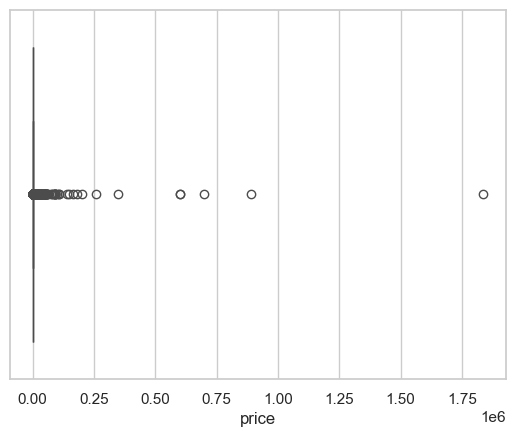

In [8]:
# Boxplot de precios de Listings Airbnb CDMX - Revisar despues de haber hecho lo del rango de confianza
sns.set(style="whitegrid")
sns.boxplot(x=df_airbnb_cdmx['price'])

<Axes: xlabel='price'>

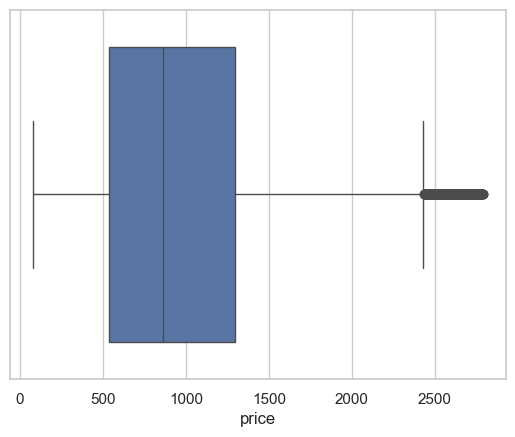

In [9]:
# Boxplot considerando Rango Intercuartílico y valores atípicos de precios de Listings Airbnb CDMX
iqr = df_airbnb_cdmx['price'].quantile(0.75) - df_airbnb_cdmx['price'].quantile(0.25)
filtro_inferior = df_airbnb_cdmx['price'] > df_airbnb_cdmx['price'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df_airbnb_cdmx['price'] < df_airbnb_cdmx['price'].quantile(0.75) + (iqr * 1.5)
df_filtrado = df_airbnb_cdmx[filtro_inferior & filtro_superior]

# sns.boxplot(df_filtrado['price'])
sns.boxplot(x=df_filtrado['price'])

In [11]:
# Eliminamos datos atípicos
# Dado que son muy pocos los valores atípicos pero afectan mucho nuestro gráfico, utilizaremos el criterio del Percentil 
# 2.5% y 95%. En este criterio, los valores atipicos se definen como aquellos que se encuentran fuera de los límites 
# [Percentil 2.5%, Percentil 97.5%].

# Declaramos algunas variables
prices = df_airbnb_cdmx['price']

percentil_025 = prices.quantile(0.025)
percentil_975 = prices.quantile(0.975)

# Declaramos los filtros
filtro_025 = df_airbnb_cdmx['price'] > percentil_025
filtro_975 =df_airbnb_cdmx['price'] < percentil_975

# Obtenemos el dataframe filtrado (01% - 99%) así como su numero de filas
df_airbnb_cdmx_95 = df_airbnb_cdmx[filtro_025 & filtro_975]
dimensiones_95 = df_airbnb_cdmx_95.shape[0]

# Obtenemos los rangos de los dataframes

    # Dataframe original
rango_prices = prices.max() - prices.min()

    # Dataframe filtrado (01% - 99%)
prices95 = df_airbnb_cdmx_95['price'] 
rango_prices95 = prices95.max() - prices95.min()


print(f'Filas del dataframe original: {prices.shape[0]}')
print(f'Precio máximo: {prices.max()}')
print(f'Precio mínimo: {prices.min()}')
print(f'Rango del dataframe original: {rango_prices}')
print("_" * 60)
print(" ")
print(f'Filas del dataframe filtrado (02.5% - 97.5%): {dimensiones_95}')
print(f'Precio máximo: {percentil_975:.2f}')
print(f'Precio mínimo: {percentil_025:.2f}')
print(f'Rango del dataframe filtrado: {rango_prices95}')

Filas del dataframe original: 26318
Precio máximo: 1838000
Precio mínimo: 75
Rango del dataframe original: 1837925
____________________________________________________________
 
Filas del dataframe filtrado (02.5% - 97.5%): 24999
Precio máximo: 5087.08
Precio mínimo: 241.00
Rango del dataframe filtrado: 4845


In [12]:
df_airbnb_cdmx_95.head()

name  host_id host_name  \
id                                                                            
35797  Villa in Mexico City · 1 bedroom · 1 bed · 1 bath   153786      Dici   
61792  Home in Mexico City · ★4.92 · 1 bedroom · 1 be...   299558   Roberto   
67703  Rental unit in Mexico City · ★4.89 · 2 bedroom...   334451  Nicholas   
70644  Rental unit in Mexico City · ★4.91 · 1 bedroom...   212109    Trisha   
84500  Home in Mexico City · 3 bedrooms · 3 beds · 3....   457875   Vicente   

       neighbourhood_group          neighbourhood  latitude  longitude  \
id                                                                       
35797                  NaN  Cuajimalpa de Morelos  19.38283  -99.27178   
61792                  NaN             Cuauhtémoc  19.41083  -99.18057   
67703                  NaN             Cuauhtémoc  19.41152  -99.16857   
70644                  NaN               Coyoacán  19.35448  -99.16217   
84500                  NaN               Coyoacán  19.34724  -99.16551   

             room_type  price  minimum_nights  number_of_reviews last_review  \
id                                                                             
35797  Entire home/apt   3437               1                  0         NaN   
61792     Private room   1031               2                 63  2023-08-27   
67703  Entire home/apt   1890               4                 47  2023-01-01   
70644  Entire home/apt    737               5                120  2023-09-16   
84500  Entire home/apt   3179              10                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
id                                                                           
35797                NaN                               1               363   
61792               0.88                               2               180   
67703               0.33                               2               307   
70644               0.85                               3               158   
84500                NaN                               1                71   

       number_of_reviews_ltm  license  
id                                     
35797                      0      NaN  
61792                      5      NaN  
67703                      4      NaN  
70644                      8      NaN  
84500                      0      NaN

In [13]:
# Tabla de frecuencias con el dataframe original

# Obtenemos 20 segmentos
segmentos = pd.cut(prices, 20)

df_airbnb_cdmx['price'].groupby(segmentos).count()

C:\Users\aizam\AppData\Local\Temp\ipykernel_20748\780002884.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_airbnb_cdmx['price'].groupby(segmentos).count()


price
(-1762.925, 91971.25]      26302
(91971.25, 183867.5]           8
(183867.5, 275763.75]          2
(275763.75, 367660.0]          1
(367660.0, 459556.25]          0
(459556.25, 551452.5]          0
(551452.5, 643348.75]          2
(643348.75, 735245.0]          1
(735245.0, 827141.25]          0
(827141.25, 919037.5]          1
(919037.5, 1010933.75]         0
(1010933.75, 1102830.0]        0
(1102830.0, 1194726.25]        0
(1194726.25, 1286622.5]        0
(1286622.5, 1378518.75]        0
(1378518.75, 1470415.0]        0
(1470415.0, 1562311.25]        0
(1562311.25, 1654207.5]        0
(1654207.5, 1746103.75]        0
(1746103.75, 1838000.0]        1
Name: price, dtype: int64

In [14]:
# Tabla de frecuencias con el dataframe filtrado df_airbnb_cdmx_0199

# Obtenemos 20 segmentos
segmentos = pd.cut(prices95, 20)

df_airbnb_cdmx_95['price'].groupby(segmentos).count()

C:\Users\aizam\AppData\Local\Temp\ipykernel_20748\1632185056.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_airbnb_cdmx_95['price'].groupby(segmentos).count()


price
(237.155, 484.25]    4352
(484.25, 726.5]      4599
(726.5, 968.75]      4361
(968.75, 1211.0]     3621
(1211.0, 1453.25]    2143
(1453.25, 1695.5]    1594
(1695.5, 1937.75]    1103
(1937.75, 2180.0]     814
(2180.0, 2422.25]     566
(2422.25, 2664.5]     469
(2664.5, 2906.75]     254
(2906.75, 3149.0]     291
(3149.0, 3391.25]     160
(3391.25, 3633.5]     194
(3633.5, 3875.75]     111
(3875.75, 4118.0]      94
(4118.0, 4360.25]      90
(4360.25, 4602.5]      58
(4602.5, 4844.75]      47
(4844.75, 5087.0]      78
Name: price, dtype: int64

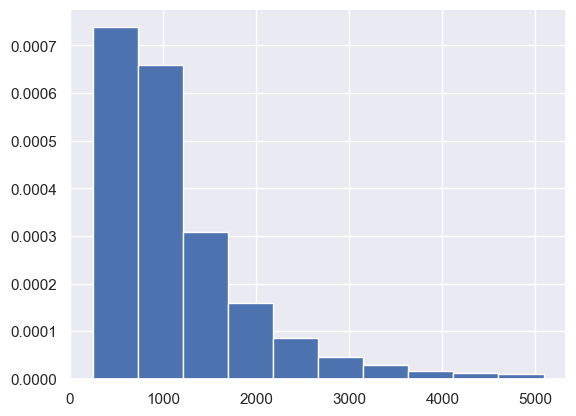

In [15]:
# Histograma - A partir de aquí solo se utilizará el dataframe filtrado (df_airbnb_cdmx_95) por lo disto en 
# las tablas de frecuencias


sns.set_style('darkgrid')
# sns.displot(df_airbnb_cdmx['price'], kde=False, bins=20)

# dist = stats.norm.fit(prices)
# plt.hist(prices, density=True)

dist = stats.norm.fit(df_airbnb_cdmx_95['price'])
plt.hist(df_airbnb_cdmx_95['price'], density=True)

# plt.plot(dist.mean, dist.pdf(dist.mean), "r-")
plt.show()

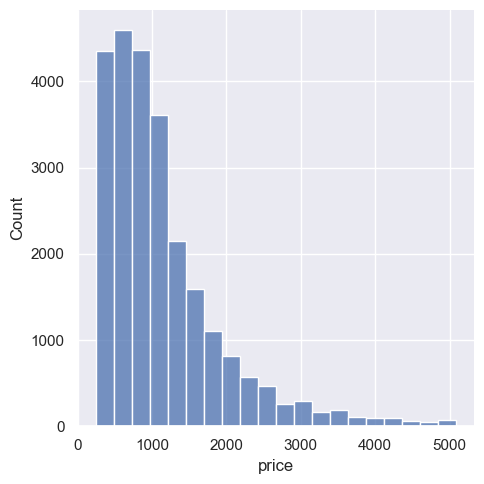

In [16]:
# Distribuciones
sns.set_style('darkgrid')
sns.displot(df_airbnb_cdmx_95['price'], kde=False, bins=20);

In [18]:
print(f'Curtosis: {kurtosis(prices95)}')
print(f'Asimetría: {skew(prices95)}')

# Revisar que tipo de distribución con los apuntes

Curtosis: 4.243750454475451
Asimetría: 1.853039568667895


<Axes: xlabel='price', ylabel='Density'>

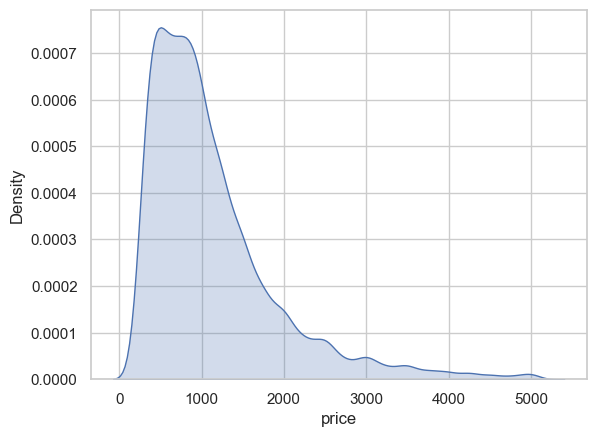

In [19]:
# Grafica de densidad - Revisar despues de haber hecho lo del rango de confianza
sns.set(style='whitegrid')

# sns.distplot(prices95, hist=False);
sns.kdeplot(prices95, fill=True)
# sns.displot(prices95);


### Exploración de Variables Categóricas y Análisis Multivariable

In [20]:
# dataframe utilizado: df_airbnb_cdmx_95
# variable de la columna precios: prices95 = df_airbnb_cdmx_95['price'] 

# Consultamos las columnas del dataframe
df_airbnb_cdmx_95.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

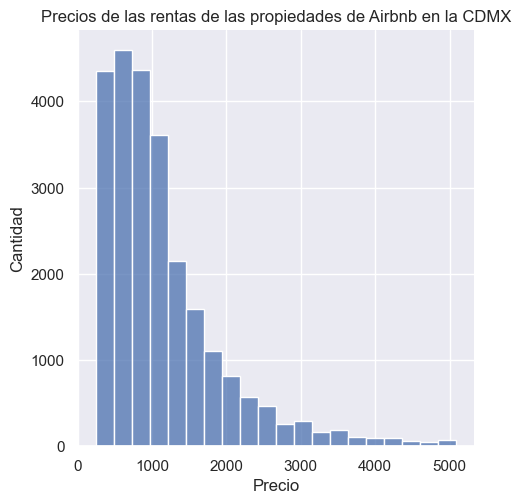

In [21]:
#Añadimos titulos y nombres a los ejes
sns.set_style('darkgrid')
ax = sns.displot(df_airbnb_cdmx_95['price'], kde=False, bins=20)
ax.set(title='Precios de las rentas de las propiedades de Airbnb en la CDMX', xlabel='Precio', ylabel='Cantidad');

In [22]:
# Consultamos las frecuencias de los tipos de habitación
frecuencias_room_type = df_airbnb_cdmx_95['room_type'].value_counts()
print(frecuencias_room_type)

room_type
Entire home/apt    16643
Private room        8065
Shared room          198
Hotel room            93
Name: count, dtype: int64


In [23]:
by_price = df_airbnb_cdmx_95.groupby(level=0)[['price']].mean()
room_type = df_airbnb_cdmx_95.groupby(level=0)['room_type'].last()
merged_rooms = by_price.merge(room_type, left_index=True, right_index=True)

entire_home_apt = by_price[merged_rooms['room_type'] == 'Entire home/apt']
private_room = by_price[merged_rooms['room_type'] == 'Private room']
shared_room = by_price[merged_rooms['room_type'] == 'Shared room']
hotel_room = by_price[merged_rooms['room_type'] == 'Hotel room']

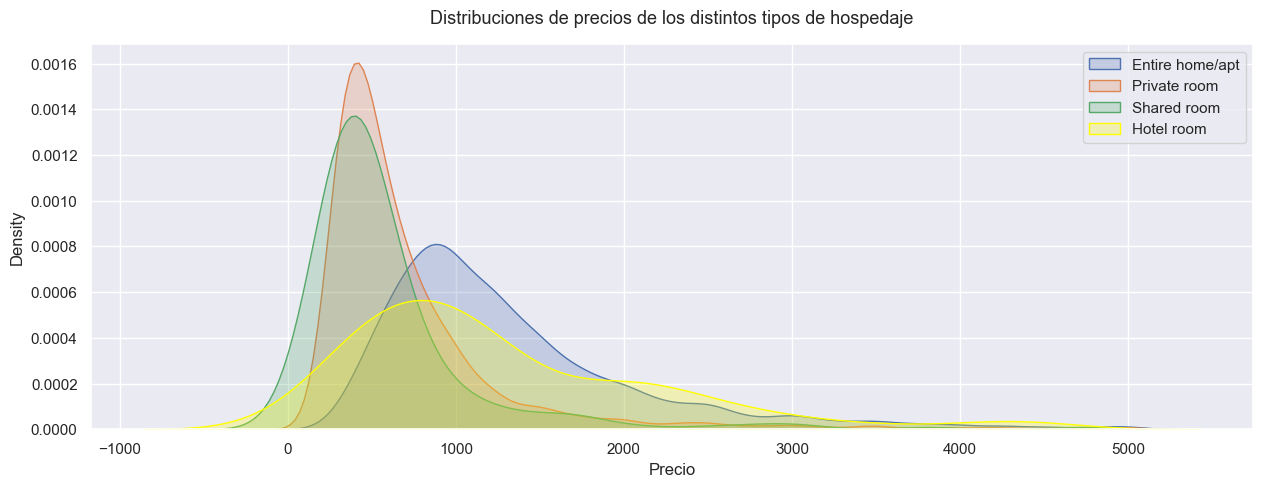

In [24]:
# Creamos la grafica con varias distribuciones

fig = plt.figure(figsize=(15, 5))

ax = sns.kdeplot(entire_home_apt['price'], fill=True, label='Entire home/apt')
sns.kdeplot(private_room['price'], fill=True, label='Private room')
sns.kdeplot(shared_room['price'], fill=True, label='Shared room')
sns.kdeplot(hotel_room['price'], fill=True, label='Hotel room', color = "yellow")

ax.set_title('Distribuciones de precios de los distintos tipos de hospedaje', fontsize=13, pad=15);
ax.set(xlabel='Precio');
ax.legend(loc='upper right');


### Correlaciones

In [25]:
# Revisamos nuestro dataframe
df_airbnb_cdmx_95.head()

name  host_id host_name  \
id                                                                            
35797  Villa in Mexico City · 1 bedroom · 1 bed · 1 bath   153786      Dici   
61792  Home in Mexico City · ★4.92 · 1 bedroom · 1 be...   299558   Roberto   
67703  Rental unit in Mexico City · ★4.89 · 2 bedroom...   334451  Nicholas   
70644  Rental unit in Mexico City · ★4.91 · 1 bedroom...   212109    Trisha   
84500  Home in Mexico City · 3 bedrooms · 3 beds · 3....   457875   Vicente   

       neighbourhood_group          neighbourhood  latitude  longitude  \
id                                                                       
35797                  NaN  Cuajimalpa de Morelos  19.38283  -99.27178   
61792                  NaN             Cuauhtémoc  19.41083  -99.18057   
67703                  NaN             Cuauhtémoc  19.41152  -99.16857   
70644                  NaN               Coyoacán  19.35448  -99.16217   
84500                  NaN               Coyoacán  19.34724  -99.16551   

             room_type  price  minimum_nights  number_of_reviews last_review  \
id                                                                             
35797  Entire home/apt   3437               1                  0         NaN   
61792     Private room   1031               2                 63  2023-08-27   
67703  Entire home/apt   1890               4                 47  2023-01-01   
70644  Entire home/apt    737               5                120  2023-09-16   
84500  Entire home/apt   3179              10                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
id                                                                           
35797                NaN                               1               363   
61792               0.88                               2               180   
67703               0.33                               2               307   
70644               0.85                               3               158   
84500                NaN                               1                71   

       number_of_reviews_ltm  license  
id                                     
35797                      0      NaN  
61792                      5      NaN  
67703                      4      NaN  
70644                      8      NaN  
84500                      0      NaN

In [26]:
# Eliminamos columnas y dejar tabla con Alcaldía, tipo de habitación, precio y disponibilidad 365.
df_airbnb_filtered_OK = df_airbnb_cdmx_95.drop(['name', 'host_id', 'host_name', 'neighbourhood_group', 'latitude', 'longitude', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'number_of_reviews_ltm', 'license'], axis =1)

df_airbnb_filtered_OK

neighbourhood        room_type  price  \
id                                                                  
35797               Cuajimalpa de Morelos  Entire home/apt   3437   
61792                          Cuauhtémoc     Private room   1031   
67703                          Cuauhtémoc  Entire home/apt   1890   
70644                            Coyoacán  Entire home/apt    737   
84500                            Coyoacán  Entire home/apt   3179   
...                                   ...              ...    ...   
985673895001471605             Cuauhtémoc  Entire home/apt   1525   
985676768542852342             Cuauhtémoc     Private room   1360   
985758830966947800             Cuauhtémoc  Entire home/apt   2400   
985775761856052521         Miguel Hidalgo  Entire home/apt   3401   
985780693129316227             Cuauhtémoc  Entire home/apt   1183   

                    minimum_nights  number_of_reviews  availability_365  
id                                                                       
35797                            1                  0               363  
61792                            2                 63               180  
67703                            4                 47               307  
70644                            5                120               158  
84500                           10                  0                71  
...                            ...                ...               ...  
985673895001471605               1                  0               269  
985676768542852342               1                  0               356  
985758830966947800               1                  0               352  
985775761856052521               1                  0               355  
985780693129316227               1                  0               287  

[24999 rows x 6 columns]

In [27]:
# Par el primer analisis eliminaremos Alcaldía y tipod e habiración
df_airbnb_filtered_onlynumbers = df_airbnb_filtered_OK.drop(['neighbourhood', 'room_type'], axis =1)

df_airbnb_filtered_onlynumbers

price  minimum_nights  number_of_reviews  availability_365
id                                                                            
35797                3437               1                  0               363
61792                1031               2                 63               180
67703                1890               4                 47               307
70644                 737               5                120               158
84500                3179              10                  0                71
...                   ...             ...                ...               ...
985673895001471605   1525               1                  0               269
985676768542852342   1360               1                  0               356
985758830966947800   2400               1                  0               352
985775761856052521   3401               1                  0               355
985780693129316227   1183               1                  0               287

[24999 rows x 4 columns]

In [28]:
# Obtenemos su matriz de correlaciones
df_airbnb_filtered_onlynumbers.corr()

price  minimum_nights  number_of_reviews  \
price              1.000000        0.011848          -0.037176   
minimum_nights     0.011848        1.000000          -0.045494   
number_of_reviews -0.037176       -0.045494           1.000000   
availability_365   0.035783       -0.038634           0.006445   

                   availability_365  
price                      0.035783  
minimum_nights            -0.038634  
number_of_reviews          0.006445  
availability_365           1.000000

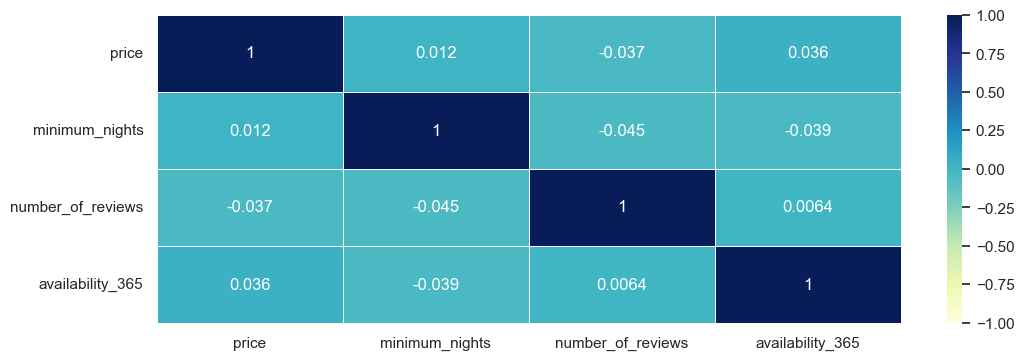

In [29]:
# Obtenemos el mapa de calor
plt.figure(figsize=(12, 4))
ax = sns.heatmap(df_airbnb_filtered_onlynumbers.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

In [30]:
# Como no hay mucha correlación, llevamos a cabo unas cuantas acciones en la tabla:
# df_airbnb_filtered_OK

# Total de prestadores de servicio por alcaldía
cant_x_alcaldia = df_airbnb_filtered_OK['neighbourhood'].value_counts()
df_cant_x_alcaldia = cant_x_alcaldia.to_frame()
df_cant_x_alcaldia = df_cant_x_alcaldia.sort_values('neighbourhood', ascending=True)
df_cant_x_alcaldia

count
neighbourhood                
Azcapotzalco              271
Benito Juárez            3185
Coyoacán                 1697
Cuajimalpa de Morelos     467
Cuauhtémoc              11256
Gustavo A. Madero         400
Iztacalco                 328
Iztapalapa                238
La Magdalena Contreras    127
Miguel Hidalgo           4421
Milpa Alta                 21
Tlalpan                   742
Tláhuac                    30
Venustiano Carranza       651
Xochimilco                125
Álvaro Obregón           1040

In [31]:
# Obtenemos los costos promedios por alcaldía y los guardamos en un dataframe
df_airbnb_cto_prom_alc = df_airbnb_filtered_OK.groupby('neighbourhood')
pre_prom_x_alcaldia = df_airbnb_cto_prom_alc['price'].mean()
df_pre_prom_x_alcaldia = pre_prom_x_alcaldia.to_frame()
df_pre_prom_x_alcaldia.sort_values('neighbourhood', ascending=True)

price
neighbourhood                      
Azcapotzalco             720.428044
Benito Juárez            902.484458
Coyoacán                 895.077784
Cuajimalpa de Morelos   1377.366167
Cuauhtémoc              1211.087864
Gustavo A. Madero        672.090000
Iztacalco                815.893293
Iztapalapa               627.121849
La Magdalena Contreras   976.440945
Miguel Hidalgo          1416.616150
Milpa Alta              1011.571429
Tlalpan                  861.281671
Tláhuac                  622.966667
Venustiano Carranza      793.768049
Xochimilco               877.856000
Álvaro Obregón          1015.312500

In [32]:
# Obtenemos las noches minimas promedio por hospedaje por alcaldía y los guardamos en un dataframe
df_airbnb_nm_prom_alc = df_airbnb_filtered_OK.groupby('neighbourhood')
nm_x_alcaldia = df_airbnb_nm_prom_alc['minimum_nights'].mean()
df_nm_x_alcaldia = nm_x_alcaldia.to_frame()
df_nm_x_alcaldia.sort_values('neighbourhood', ascending=True)

minimum_nights
neighbourhood                         
Azcapotzalco                  2.889299
Benito Juárez                 5.127473
Coyoacán                      4.140247
Cuajimalpa de Morelos         6.717345
Cuauhtémoc                    3.464908
Gustavo A. Madero             3.740000
Iztacalco                     1.743902
Iztapalapa                    3.096639
La Magdalena Contreras        6.023622
Miguel Hidalgo                4.790319
Milpa Alta                    1.571429
Tlalpan                       6.584906
Tláhuac                      15.533333
Venustiano Carranza           2.139785
Xochimilco                    3.504000
Álvaro Obregón                5.203846

In [33]:
# Obtenemos promedio de numero de reseñas por lugar por alcaldía y los guardamos en un dataframe
df_airbnb_nv_prom_alc = df_airbnb_filtered_OK.groupby('neighbourhood')
nv_x_alcaldia = df_airbnb_nv_prom_alc['number_of_reviews'].mean()
df_nv_x_alcaldia = nv_x_alcaldia.to_frame()
df_nv_x_alcaldia.sort_values('neighbourhood', ascending=True)

number_of_reviews
neighbourhood                            
Azcapotzalco                    34.896679
Benito Juárez                   30.332182
Coyoacán                        34.270477
Cuajimalpa de Morelos           23.708779
Cuauhtémoc                      46.666933
Gustavo A. Madero               31.270000
Iztacalco                       31.158537
Iztapalapa                      16.626050
La Magdalena Contreras          14.188976
Miguel Hidalgo                  34.727890
Milpa Alta                       4.761905
Tlalpan                         19.118598
Tláhuac                          5.266667
Venustiano Carranza             65.791091
Xochimilco                      13.528000
Álvaro Obregón                  20.276923

In [34]:
# Obtenemos la disponibilidad 364 promedio de los lugares por alcaldía y los guardamos en un dataframe
df_airbnb_a365_prom_alc = df_airbnb_filtered_OK.groupby('neighbourhood')
a365_x_alcaldia = df_airbnb_a365_prom_alc['availability_365'].mean()
df_a365_x_alcaldia = a365_x_alcaldia.to_frame()
df_a365_x_alcaldia.sort_values('neighbourhood', ascending=True)

availability_365
neighbourhood                           
Azcapotzalco                  239.361624
Benito Juárez                 221.271586
Coyoacán                      221.310548
Cuajimalpa de Morelos         242.119914
Cuauhtémoc                    228.597193
Gustavo A. Madero             238.355000
Iztacalco                     217.243902
Iztapalapa                    227.819328
La Magdalena Contreras        217.511811
Miguel Hidalgo                231.688984
Milpa Alta                    237.142857
Tlalpan                       224.809973
Tláhuac                       271.500000
Venustiano Carranza           220.049155
Xochimilco                    196.600000
Álvaro Obregón                228.105769

In [35]:
# Concatenamos dataframes
df_res_airbnb_cdmx = pd.concat([df_cant_x_alcaldia, df_pre_prom_x_alcaldia, df_nm_x_alcaldia, df_nv_x_alcaldia, df_a365_x_alcaldia], axis=0, join='outer')
df_res_airbnb_cdmx.head(16)

# df_cant_x_alcaldia -
# df_pre_prom_x_alcaldia -
# df_nm_x_alcaldia -
# df_nv_x_alcaldia -
# df_a365_x_alcaldia


count  price  minimum_nights  number_of_reviews  \
neighbourhood                                                               
Azcapotzalco              271.0    NaN             NaN                NaN   
Benito Juárez            3185.0    NaN             NaN                NaN   
Coyoacán                 1697.0    NaN             NaN                NaN   
Cuajimalpa de Morelos     467.0    NaN             NaN                NaN   
Cuauhtémoc              11256.0    NaN             NaN                NaN   
Gustavo A. Madero         400.0    NaN             NaN                NaN   
Iztacalco                 328.0    NaN             NaN                NaN   
Iztapalapa                238.0    NaN             NaN                NaN   
La Magdalena Contreras    127.0    NaN             NaN                NaN   
Miguel Hidalgo           4421.0    NaN             NaN                NaN   
Milpa Alta                 21.0    NaN             NaN                NaN   
Tlalpan                   742.0    NaN             NaN                NaN   
Tláhuac                    30.0    NaN             NaN                NaN   
Venustiano Carranza       651.0    NaN             NaN                NaN   
Xochimilco                125.0    NaN             NaN                NaN   
Álvaro Obregón           1040.0    NaN             NaN                NaN   

                        availability_365  
neighbourhood                             
Azcapotzalco                         NaN  
Benito Juárez                        NaN  
Coyoacán                             NaN  
Cuajimalpa de Morelos                NaN  
Cuauhtémoc                           NaN  
Gustavo A. Madero                    NaN  
Iztacalco                            NaN  
Iztapalapa                           NaN  
La Magdalena Contreras               NaN  
Miguel Hidalgo                       NaN  
Milpa Alta                           NaN  
Tlalpan                              NaN  
Tláhuac                              NaN  
Venustiano Carranza                  NaN  
Xochimilco                           NaN  
Álvaro Obregón                       NaN

In [36]:
# Hacemos merge entre las diferentes tablas concentradoras de alcaldias hechas con el dataset original
df_airbnb_all_1 = pd.merge(df_cant_x_alcaldia, df_pre_prom_x_alcaldia, on='neighbourhood')
df_airbnb_all_2 = pd.merge(df_airbnb_all_1, df_nm_x_alcaldia, on='neighbourhood')
df_airbnb_all_3 = pd.merge(df_airbnb_all_2, df_nv_x_alcaldia, on='neighbourhood')
df_airbnb_all_4 = pd.merge(df_airbnb_all_3, df_a365_x_alcaldia, on='neighbourhood')
df_airbnb_all_4

count        price  minimum_nights  number_of_reviews  \
neighbourhood                                                                   
Azcapotzalco              271   720.428044        2.889299          34.896679   
Benito Juárez            3185   902.484458        5.127473          30.332182   
Coyoacán                 1697   895.077784        4.140247          34.270477   
Cuajimalpa de Morelos     467  1377.366167        6.717345          23.708779   
Cuauhtémoc              11256  1211.087864        3.464908          46.666933   
Gustavo A. Madero         400   672.090000        3.740000          31.270000   
Iztacalco                 328   815.893293        1.743902          31.158537   
Iztapalapa                238   627.121849        3.096639          16.626050   
La Magdalena Contreras    127   976.440945        6.023622          14.188976   
Miguel Hidalgo           4421  1416.616150        4.790319          34.727890   
Milpa Alta                 21  1011.571429        1.571429           4.761905   
Tlalpan                   742   861.281671        6.584906          19.118598   
Tláhuac                    30   622.966667       15.533333           5.266667   
Venustiano Carranza       651   793.768049        2.139785          65.791091   
Xochimilco                125   877.856000        3.504000          13.528000   
Álvaro Obregón           1040  1015.312500        5.203846          20.276923   

                        availability_365  
neighbourhood                             
Azcapotzalco                  239.361624  
Benito Juárez                 221.271586  
Coyoacán                      221.310548  
Cuajimalpa de Morelos         242.119914  
Cuauhtémoc                    228.597193  
Gustavo A. Madero             238.355000  
Iztacalco                     217.243902  
Iztapalapa                    227.819328  
La Magdalena Contreras        217.511811  
Miguel Hidalgo                231.688984  
Milpa Alta                    237.142857  
Tlalpan                       224.809973  
Tláhuac                       271.500000  
Venustiano Carranza           220.049155  
Xochimilco                    196.600000  
Álvaro Obregón                228.105769

In [37]:
# Importamos un segundo dataset
# Dataset Listings Airbnb CDMX
df_ids_alcaldias = pd.read_csv('https://raw.githubusercontent.com/liazamudio/datasets/main/ids_alcaldias.csv', index_col=0)
# df_ids_alcaldias_cal = df_ids_alcaldias.drop(['E_IDS_V'], axis =1)
df_ids_alcaldias_cal = df_ids_alcaldias
df_ids_alcaldias_cal.sort_values('alcaldia', ascending=True)
df_ids_alcaldias_cal = df_ids_alcaldias_cal.set_index('alcaldia')
df_ids_alcaldias_cal

IDS   E_IDS_V
alcaldia                                  
Azcapotzalco            0.878648     Medio
Coyoacán                0.876103     Medio
Cuajimalpa de Morelos   0.842207     Medio
Gustavo A. Madero       0.840080     Medio
Iztacalco               0.849362     Medio
Iztapalapa              0.802963      Bajo
La Magdalena Contreras  0.826904      Bajo
Milpa Alta              0.758239  Muy bajo
Álvaro Obregón          0.845527     Medio
Tláhuac                 0.808841      Bajo
Tlalpan                 0.830854      Bajo
Xochimilco              0.802639      Bajo
Benito Juárez           0.932075      Alto
Cuauhtémoc              0.848301     Medio
Miguel Hidalgo          0.894336      Alto
Venustiano Carranza     0.835464     Medio

In [38]:
# Reemplazamos los valores de E_IDS_V de adjetivos calificativos a numeros
df_ids_alcaldias_E_IDS_V = df_ids_alcaldias_cal
df_ids_alcaldias_E_IDS_V['E_IDS_V'].replace('Muy bajo', 0, inplace=True)
df_ids_alcaldias_E_IDS_V['E_IDS_V'].replace('Bajo', 1, inplace=True)
df_ids_alcaldias_E_IDS_V['E_IDS_V'].replace('Medio', 2, inplace=True)
df_ids_alcaldias_E_IDS_V['E_IDS_V'].replace('Alto', 3, inplace=True)
df_ids_alcaldias_E_IDS_V

C:\Users\aizam\AppData\Local\Temp\ipykernel_20748\791793755.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ids_alcaldias_E_IDS_V['E_IDS_V'].replace('Muy bajo', 0, inplace=True)
C:\Users\aizam\AppData\Local\Temp\ipykernel_20748\791793755.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

IDS  E_IDS_V
alcaldia                                 
Azcapotzalco            0.878648        2
Coyoacán                0.876103        2
Cuajimalpa de Morelos   0.842207        2
Gustavo A. Madero       0.840080        2
Iztacalco               0.849362        2
Iztapalapa              0.802963        1
La Magdalena Contreras  0.826904        1
Milpa Alta              0.758239        0
Álvaro Obregón          0.845527        2
Tláhuac                 0.808841        1
Tlalpan                 0.830854        1
Xochimilco              0.802639        1
Benito Juárez           0.932075        3
Cuauhtémoc              0.848301        2
Miguel Hidalgo          0.894336        3
Venustiano Carranza     0.835464        2

In [39]:
# Tabla concentradora de analisis por Alcaldía
# Hacemos merge entre nuestra primeta tabla concentradora con el dataset importado

# df_airbnb_all_5 = pd.merge(df_airbnb_all_4, df_ids_alcaldias_cal, left_index=True, right_index=True)
df_airbnb_all_5 = pd.merge(df_airbnb_all_4, df_ids_alcaldias_E_IDS_V, left_index=True, right_index=True)
df_airbnb_all_5

count        price  minimum_nights  number_of_reviews  \
Azcapotzalco              271   720.428044        2.889299          34.896679   
Benito Juárez            3185   902.484458        5.127473          30.332182   
Coyoacán                 1697   895.077784        4.140247          34.270477   
Cuajimalpa de Morelos     467  1377.366167        6.717345          23.708779   
Cuauhtémoc              11256  1211.087864        3.464908          46.666933   
Gustavo A. Madero         400   672.090000        3.740000          31.270000   
Iztacalco                 328   815.893293        1.743902          31.158537   
Iztapalapa                238   627.121849        3.096639          16.626050   
La Magdalena Contreras    127   976.440945        6.023622          14.188976   
Miguel Hidalgo           4421  1416.616150        4.790319          34.727890   
Milpa Alta                 21  1011.571429        1.571429           4.761905   
Tlalpan                   742   861.281671        6.584906          19.118598   
Tláhuac                    30   622.966667       15.533333           5.266667   
Venustiano Carranza       651   793.768049        2.139785          65.791091   
Xochimilco                125   877.856000        3.504000          13.528000   
Álvaro Obregón           1040  1015.312500        5.203846          20.276923   

                        availability_365       IDS  E_IDS_V  
Azcapotzalco                  239.361624  0.878648        2  
Benito Juárez                 221.271586  0.932075        3  
Coyoacán                      221.310548  0.876103        2  
Cuajimalpa de Morelos         242.119914  0.842207        2  
Cuauhtémoc                    228.597193  0.848301        2  
Gustavo A. Madero             238.355000  0.840080        2  
Iztacalco                     217.243902  0.849362        2  
Iztapalapa                    227.819328  0.802963        1  
La Magdalena Contreras        217.511811  0.826904        1  
Miguel Hidalgo                231.688984  0.894336        3  
Milpa Alta                    237.142857  0.758239        0  
Tlalpan                       224.809973  0.830854        1  
Tláhuac                       271.500000  0.808841        1  
Venustiano Carranza           220.049155  0.835464        2  
Xochimilco                    196.600000  0.802639        1  
Álvaro Obregón                228.105769  0.845527        2

In [40]:
# Matriz de correlaciones de la tabla concentradora de analisis por Alcaldía
df_airbnb_all_5.corr()

count     price  minimum_nights  number_of_reviews  \
count              1.000000  0.500992       -0.109871           0.442146   
price              0.500992  1.000000       -0.095398           0.124366   
minimum_nights    -0.109871 -0.095398        1.000000          -0.429972   
number_of_reviews  0.442146  0.124366       -0.429972           1.000000   
availability_365  -0.051161 -0.089608        0.651037          -0.230373   
IDS                0.359108  0.231241       -0.039445           0.513537   
E_IDS_V            0.414410  0.333282       -0.105623           0.647230   

                   availability_365       IDS   E_IDS_V  
count                     -0.051161  0.359108  0.414410  
price                     -0.089608  0.231241  0.333282  
minimum_nights             0.651037 -0.039445 -0.105623  
number_of_reviews         -0.230373  0.513537  0.647230  
availability_365           1.000000 -0.106450 -0.077911  
IDS                       -0.106450  1.000000  0.921155  
E_IDS_V                   -0.077911  0.921155  1.000000

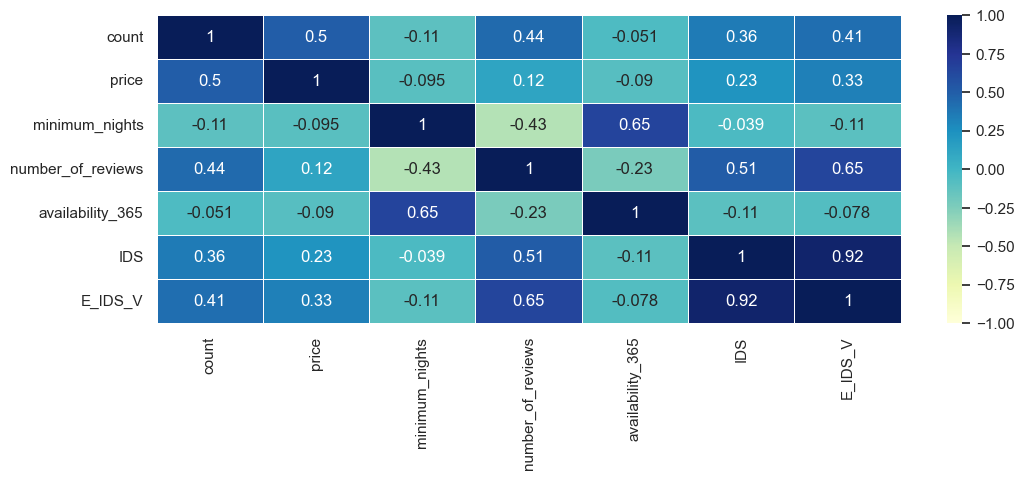

In [152]:
# Mapa de calor 

plt.figure(figsize=(12, 4))
ax = sns.heatmap(df_airbnb_all_5.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

In [41]:
# Mapas de dispersión
# Hacemos un merge entre el dataframe filtrado y el de IDS (Indice de desarrollo social)

df_airbnb_all_7 = pd.merge(df_airbnb_filtered_OK, df_ids_alcaldias_E_IDS_V, left_on='neighbourhood', right_index=True).sort_index()
df_airbnb_all_7

neighbourhood        room_type  price  \
id                                                                  
35797               Cuajimalpa de Morelos  Entire home/apt   3437   
61792                          Cuauhtémoc     Private room   1031   
67703                          Cuauhtémoc  Entire home/apt   1890   
70644                            Coyoacán  Entire home/apt    737   
84500                            Coyoacán  Entire home/apt   3179   
...                                   ...              ...    ...   
985673895001471605             Cuauhtémoc  Entire home/apt   1525   
985676768542852342             Cuauhtémoc     Private room   1360   
985758830966947800             Cuauhtémoc  Entire home/apt   2400   
985775761856052521         Miguel Hidalgo  Entire home/apt   3401   
985780693129316227             Cuauhtémoc  Entire home/apt   1183   

                    minimum_nights  number_of_reviews  availability_365  \
id                                                                        
35797                            1                  0               363   
61792                            2                 63               180   
67703                            4                 47               307   
70644                            5                120               158   
84500                           10                  0                71   
...                            ...                ...               ...   
985673895001471605               1                  0               269   
985676768542852342               1                  0               356   
985758830966947800               1                  0               352   
985775761856052521               1                  0               355   
985780693129316227               1                  0               287   

                         IDS  E_IDS_V  
id                                     
35797               0.842207        2  
61792               0.848301        2  
67703               0.848301        2  
70644               0.876103        2  
84500               0.876103        2  
...                      ...      ...  
985673895001471605  0.848301        2  
985676768542852342  0.848301        2  
985758830966947800  0.848301        2  
985775761856052521  0.894336        3  
985780693129316227  0.848301        2  

[24999 rows x 8 columns]

<Axes: xlabel='price', ylabel='neighbourhood'>

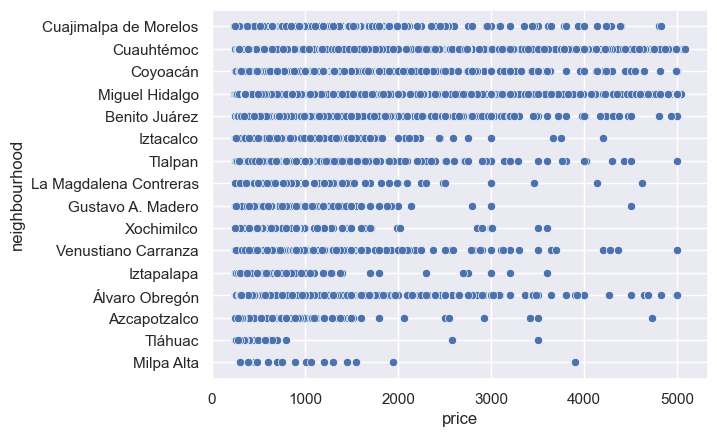

In [42]:
# Realizamos el primer mapa de dispersión
sns.scatterplot(x=df_airbnb_all_7['price'], y=df_airbnb_all_7['neighbourhood'])

<Axes: xlabel='price', ylabel='IDS'>

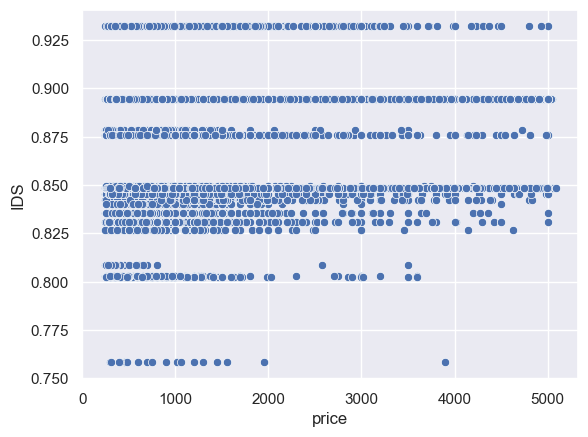

In [44]:
# Realizamos el segundo mapa de dispersión
sns.scatterplot(x=df_airbnb_all_7['price'], y=df_airbnb_all_7['IDS'])

<Axes: xlabel='number_of_reviews', ylabel='IDS'>

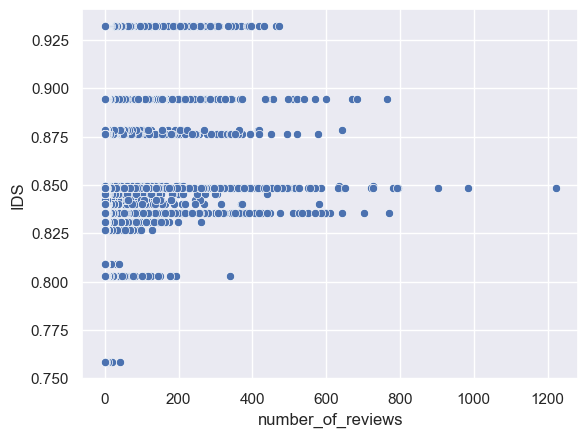

In [45]:
# Realizamos el tercer mapa de dispersión
sns.scatterplot(x=df_airbnb_all_7['number_of_reviews'], y=df_airbnb_all_7['IDS'])

<Axes: xlabel='price', ylabel='number_of_reviews'>

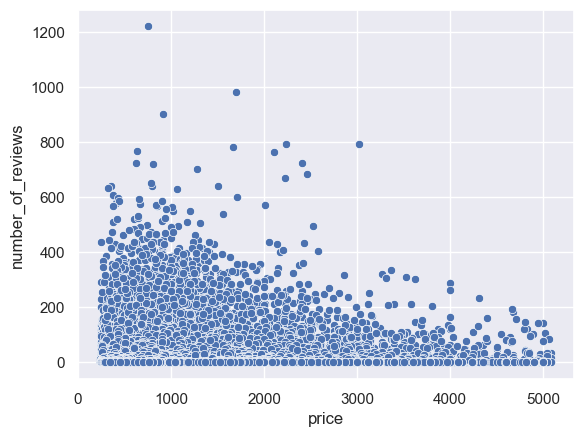

In [46]:
# Realizamos el cuarto mapa de dispersión
sns.scatterplot(x=df_airbnb_all_7['price'], y=df_airbnb_all_7['number_of_reviews'])

In [47]:
# Correlación entre precio y numero de vistas
df_airbnb_all_7['price'].corr(df_airbnb_all_7['number_of_reviews'])

np.float64(-0.03717572902665274)

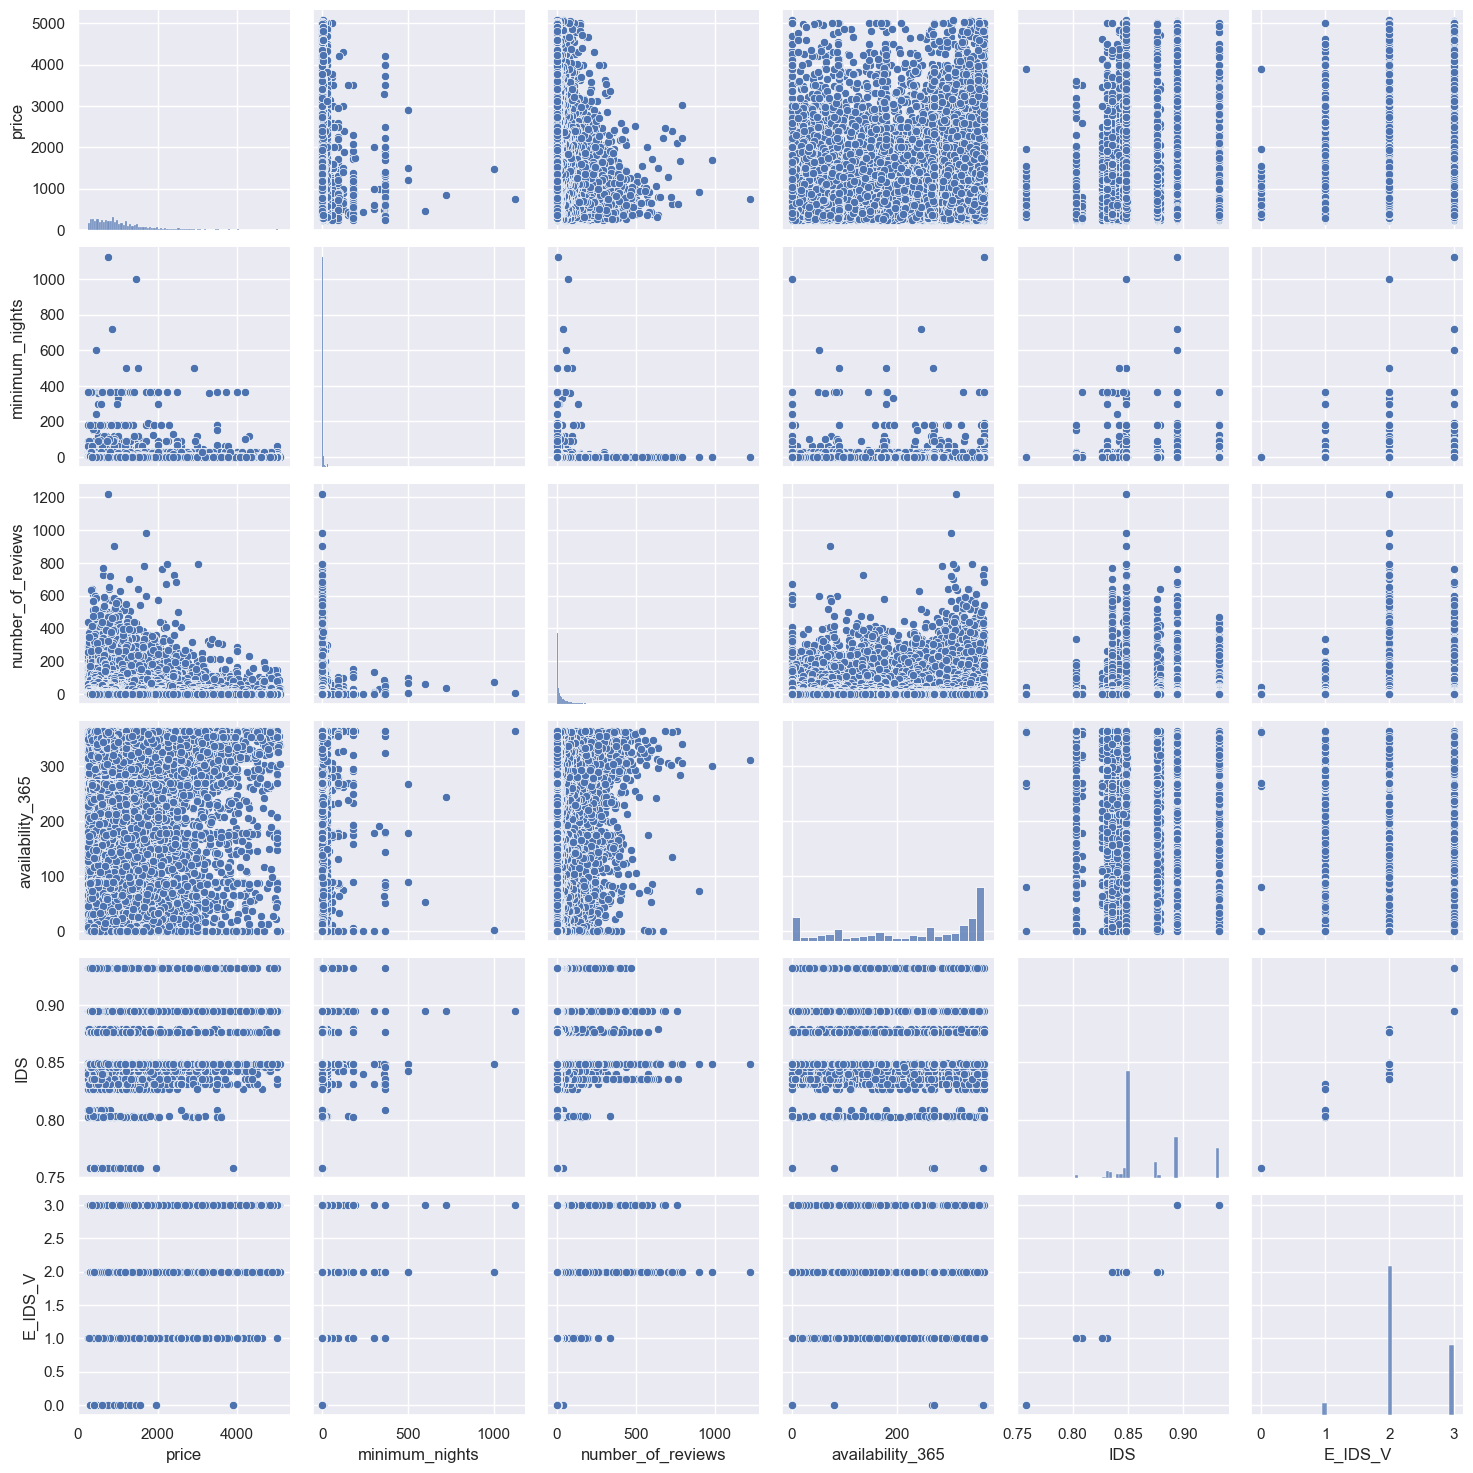

In [48]:
# Pairplots con dataframe completo
sns.pairplot(df_airbnb_all_7);

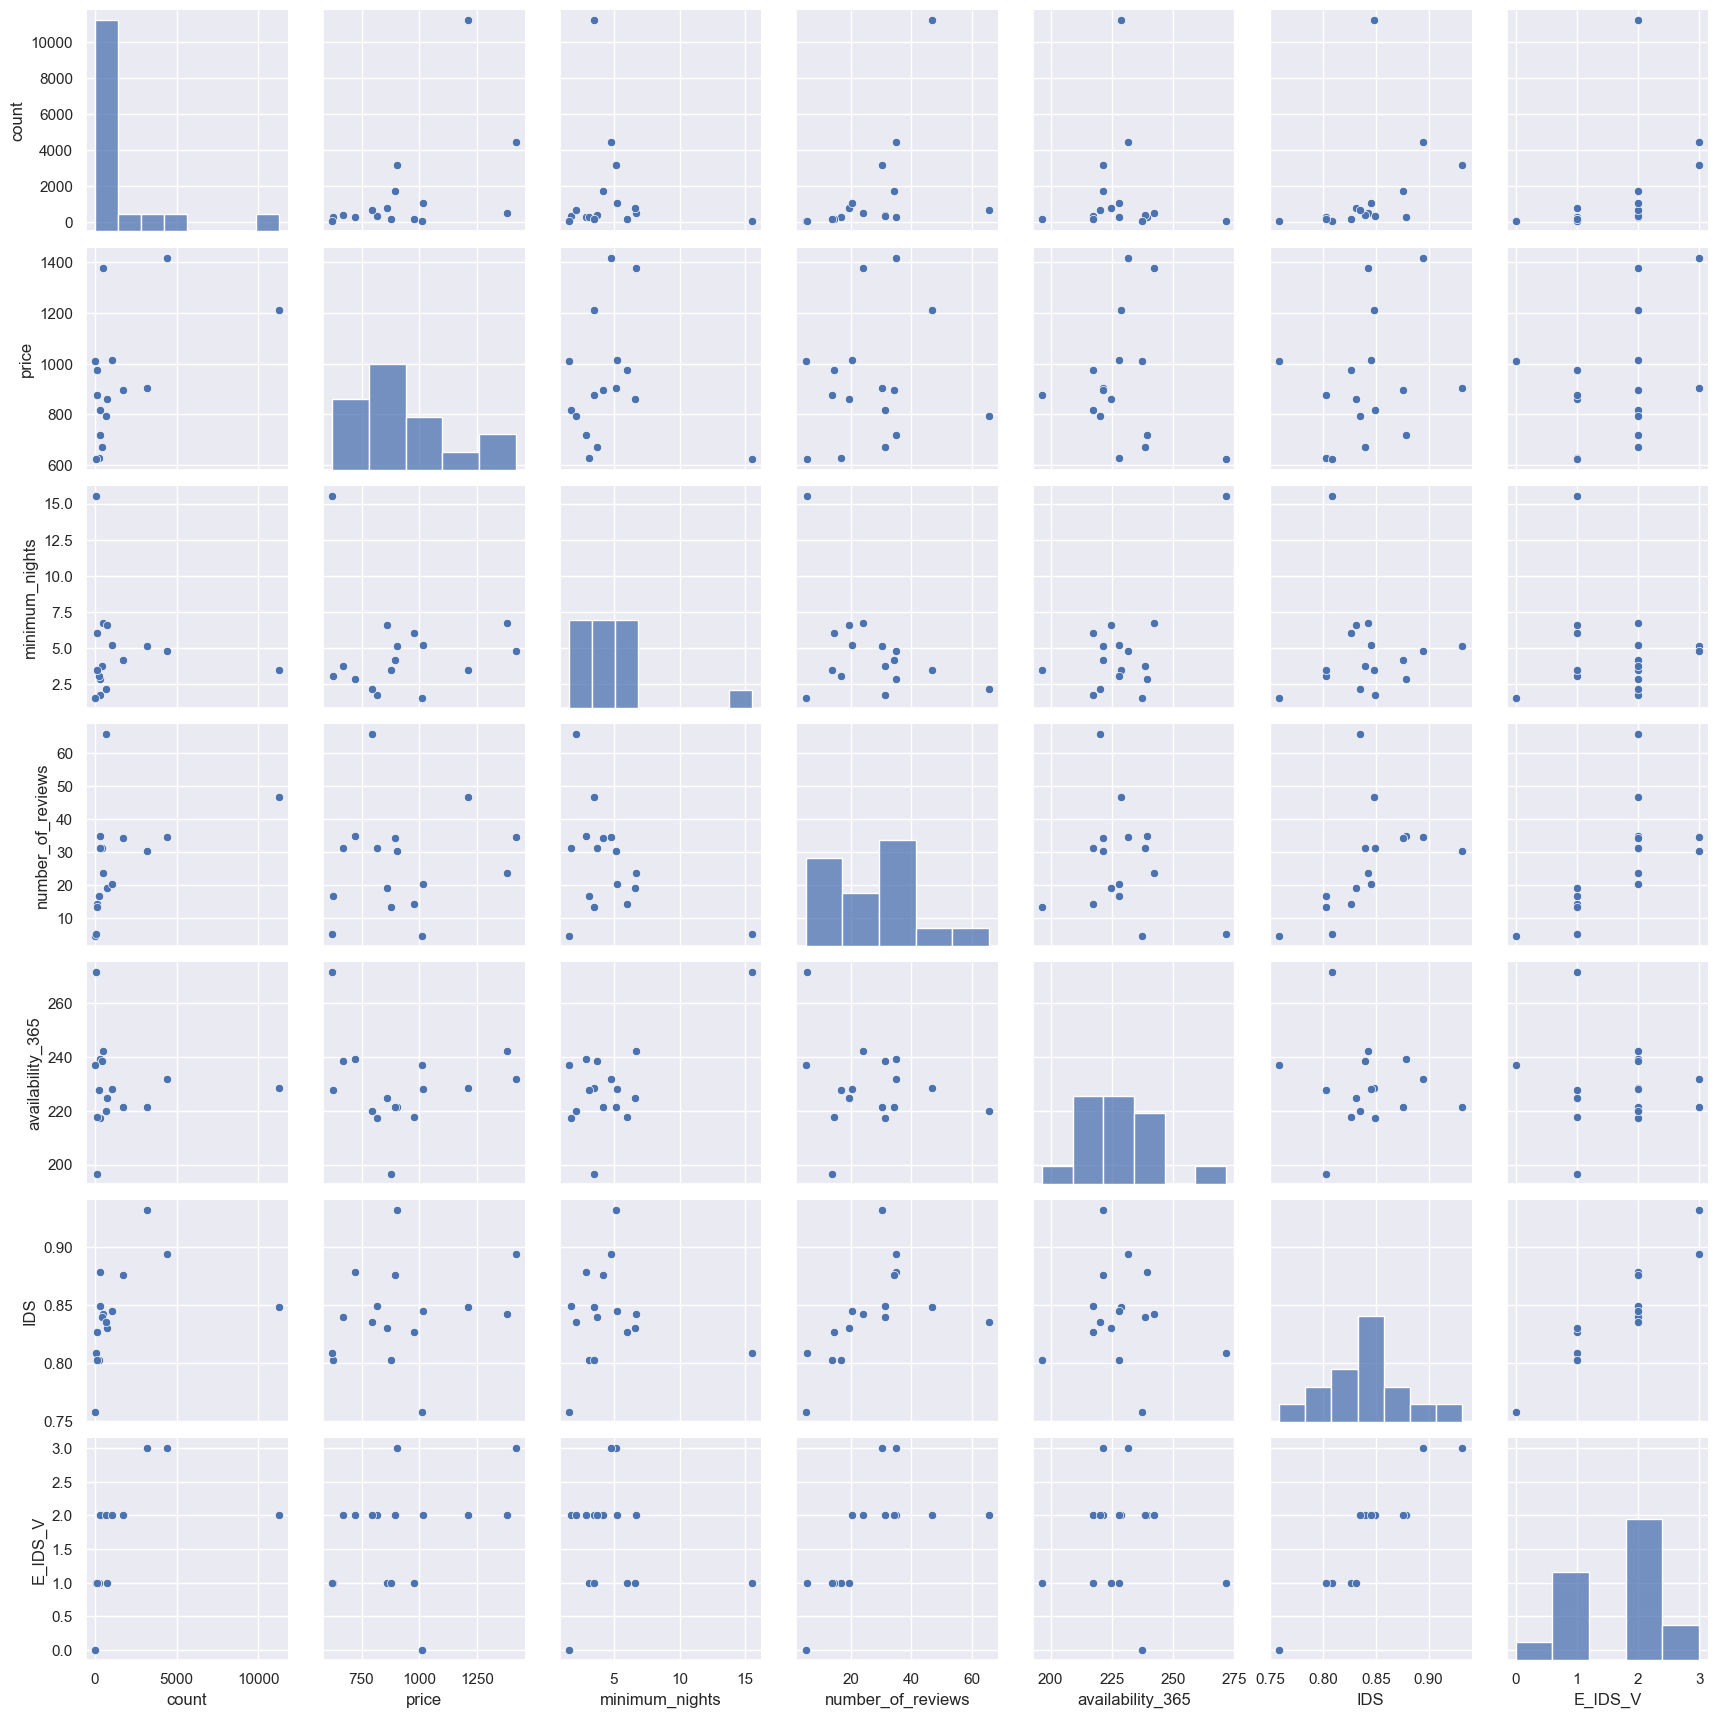

In [49]:
# Pairplots con dataframe completo agrupado
sns.pairplot(df_airbnb_all_5);

<Axes: xlabel='IDS', ylabel='price'>

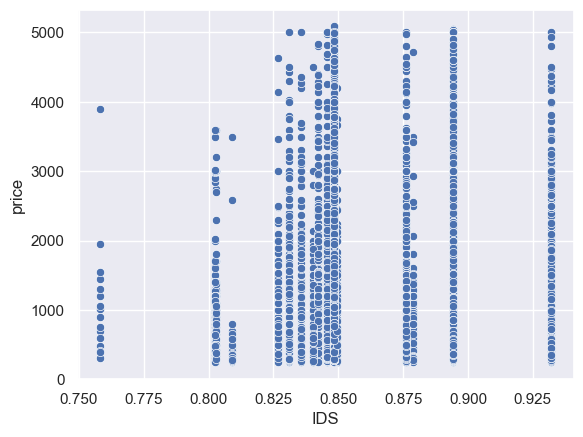

In [50]:
# Regresión lineal
serie1 = df_airbnb_all_7['IDS']
serie2 = df_airbnb_all_7['price']
sns.scatterplot(x = serie1, y = serie2)

In [51]:
serie1.corr(serie2)

np.float64(-0.00364822245686835)

<Axes: xlabel='count', ylabel='price'>

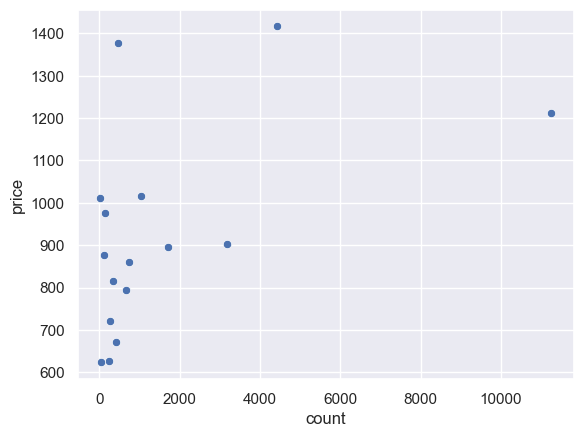

In [52]:
serie1c = df_airbnb_all_5['count']
serie2c = df_airbnb_all_5['price']
sns.scatterplot(x = serie1c, y = serie2c)

In [53]:
serie1c.corr(serie2c)

np.float64(0.5009923035181464)

In [54]:
# Se tomará el dataframe agrupado debido a que el completo nos marcaba error
# Se instaló sklearn con pip install scikit-learn
from sklearn.linear_model import LinearRegression

In [55]:
lr = LinearRegression()
# Usamos `to_frame` para convertir nuestra Serie en una estructura de 2 dimensiones, como lo requiere el modelo
lr.fit(serie1c.to_frame(), serie2c)

LinearRegression()

In [56]:
print(lr.fit(serie1c.to_frame(), serie2c))

LinearRegression()


In [57]:
# Usando nuestro modelo entrenado, usamos de nuevo nuestra variable x para intentar predecir y: y = a*x + b
y_predict = lr.predict(serie1c.to_frame())

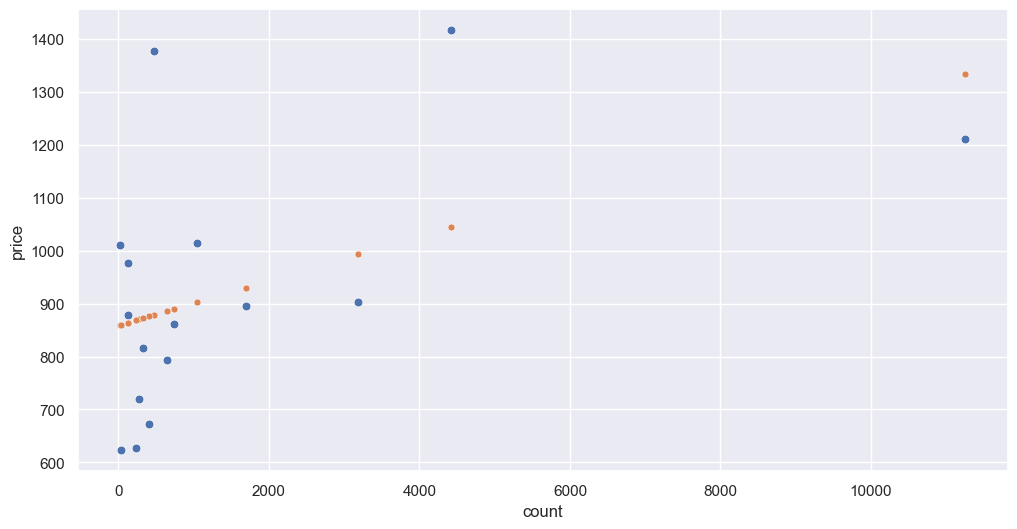

In [58]:
# Graficamos ahora nuestros y originales (azul) y los y predecidos (naranja):
plt.figure(figsize=(12, 6))
sns.scatterplot(x=serie1c, y=serie2c, s=40);
sns.scatterplot(x=serie1c, y=y_predict, s=25);

C:\Users\aizam\AppData\Local\Temp\ipykernel_20748\2801351752.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([serie1c[i], serie1c[i]], [serie2c[i], y_predict[i]], 'g--')


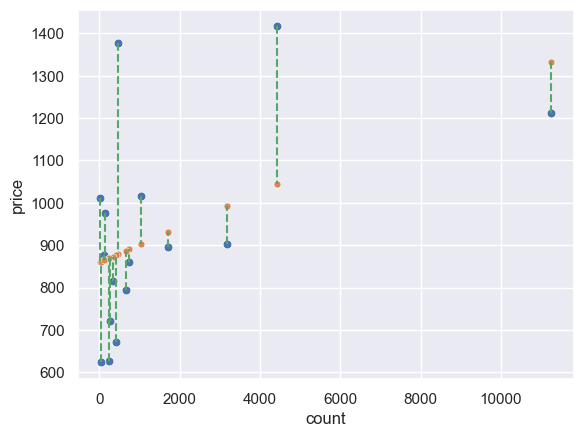

In [59]:
# Graficamos con el margen de error
# plt.figure(figsize=(12, 6))

sns.scatterplot(x=serie1c, y=serie2c, s=40);
sns.scatterplot(x=serie1c, y=y_predict, s=25);

for i in range(len(serie1c)):
    plt.plot([serie1c[i], serie1c[i]], [serie2c[i], y_predict[i]], 'g--')


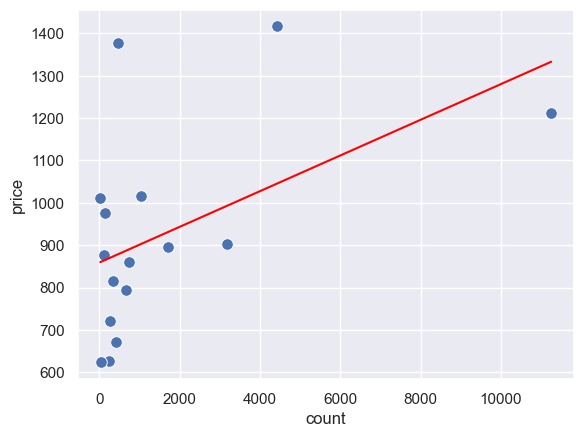

In [60]:
# Ponemos una linea en el lugar de los puntos rojos
sns.scatterplot(x=serie1c, y=serie2c, s=70);
sns.lineplot(x=serie1c, y=y_predict, color='red');

In [61]:
# Empezamos a extraer la ecuación
intercept = lr.intercept_
coefficient = lr.coef_[0]

In [62]:
# Determinamos nuestra ecuación
print(f'y = {coefficient.round(2)} * x + {intercept.round(2)}')

y = 0.04 * x + 859.02


In [63]:
# La comprobamos
print(f'Valor de x: {serie1c[10]}')
print(f'Valor predecido por nuestro modelo: {y_predict[10]}')
print(f'Valor cuantificado directamente usando la funcion: {coefficient * serie1c[10] + intercept}')

Valor de x: 21
Valor predecido por nuestro modelo: 859.8999594715889
Valor cuantificado directamente usando la funcion: 859.8999594715889


C:\Users\aizam\AppData\Local\Temp\ipykernel_20748\3955302037.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Valor de x: {serie1c[10]}')
C:\Users\aizam\AppData\Local\Temp\ipykernel_20748\3955302037.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Valor cuantificado directamente usando la funcion: {coefficient * serie1c[10] + intercept}')


In [64]:
# Efectividad del modelo usando el coeficiente de determinación o R2 (R al cuadrado)
print(f'R2: {np.power(serie1c.corr(serie2c), 2)}')

R2: 0.2509932881844185


In [65]:
# Usando el método score de nuestro modelo
print(f'R2: {lr.score(serie1c.to_frame(), serie2c)}')


R2: 0.2509932881844187


### Distribuciones muestrales y técnicas de evaluación de modelos

In [399]:
# BOOTSTRAPING
# Revisamos nuestro dataset original
df_airbnb_cdmx.head()

name  host_id  \
id                                                                  
35797  Villa in Mexico City · 1 bedroom · 1 bed · 1 bath   153786   
44616  Home in Mexico City · ★4.58 · 5 bedrooms · 8 b...   196253   
61792  Home in Mexico City · ★4.92 · 1 bedroom · 1 be...   299558   
67703  Rental unit in Mexico City · ★4.89 · 2 bedroom...   334451   
70644  Rental unit in Mexico City · ★4.91 · 1 bedroom...   212109   

                                host_name  neighbourhood_group  \
id                                                               
35797                                Dici                  NaN   
44616  Condesa Haus Bed & Breakfast  CDMX                  NaN   
61792                             Roberto                  NaN   
67703                            Nicholas                  NaN   
70644                              Trisha                  NaN   

               neighbourhood  latitude  longitude        room_type  price  \
id                                                                          
35797  Cuajimalpa de Morelos  19.38283  -99.27178  Entire home/apt   3437   
44616             Cuauhtémoc  19.41162  -99.17794  Entire home/apt  18000   
61792             Cuauhtémoc  19.41083  -99.18057     Private room   1031   
67703             Cuauhtémoc  19.41152  -99.16857  Entire home/apt   1890   
70644               Coyoacán  19.35448  -99.16217  Entire home/apt    737   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
id                                                                        
35797               1                  0         NaN                NaN   
44616               1                 64  2023-03-26               0.44   
61792               2                 63  2023-08-27               0.88   
67703               4                 47  2023-01-01               0.33   
70644               5                120  2023-09-16               0.85   

       calculated_host_listings_count  availability_365  \
id                                                        
35797                               1               363   
44616                              13               358   
61792                               2               180   
67703                               2               307   
70644                               3               158   

       number_of_reviews_ltm  license  clasificaciones  
id                                                      
35797                      0      NaN                3  
44616                      5      NaN                2  
61792                      5      NaN                2  
67703                      4      NaN                2  
70644                      8      NaN                1

In [66]:
# Repasaremos las dimensiones del dataframe
df_airbnb_cdmx.shape

(26318, 17)

In [67]:
# Definimos las variables del tamaño de la muestra y el nombre del dataframe. Será una muestra aleatoria
tamaño_muestra = 0.05
df_analizado = df_airbnb_cdmx

# Realizamos los calculos del tamaño de la muestra
muestra = int((df_analizado.shape[0]) * tamaño_muestra)

# Definimos la columna analizada y obtenemos la muestra de tamaño n=muestra con reemplazo
columna_evaluada = 'price'
muestra1 = df_analizado[columna_evaluada].sample(n=muestra, replace=True)
muestra1

id
582822804020814535     394
21530946               458
42668576               900
797884495572496899    1777
5304932                950
                      ... 
53783826              1828
50010498              1550
935505190458789294     812
51442729              1499
43758311              3500
Name: price, Length: 1315, dtype: int64

In [68]:
media_dataset = df_analizado['price'].mean()
media_muestra = muestra1.mean()

print(f'Media del dataset: {media_dataset}')
print(f'Media de la muestra: {media_muestra}')

Media del dataset: 1637.101603465309
Media de la muestra: 1777.6410646387833


In [69]:
# Hacemos Bootstraping
boots_price = df_analizado['price']

means = []
desv = []
mediana = []

for i in range(100_000):
    sample = boots_price.sample( n = muestra, replace=True)  # selecciona una muestra de tamaño predefinido (5%)
    means.append(sample.mean())
    desv.append(sample.std())
    mediana.append(sample.median())

serie_means = pd.Series(means)
desv_means = pd.Series(desv)
serie_mediana = pd.Series(mediana)

print("Dataframe filtrado al 95%")
print(f'Promedios: {boots_price.mean()}')
print(f'Desviación estandar: {boots_price.std()}')
print(f'Mediana: {boots_price.median()}')
print("_" * 60)
print(" ")
print("Medias de las 100_000 muestras de tamaño 5%")
print(f'Promedios : {serie_means.mean()}')
print(f'Desviación estandar: {desv_means.mean()}')
print(f'Mediana: {serie_mediana.mean()}')


Dataframe filtrado al 95%
Promedios: 1637.101603465309
Desviación estandar: 15023.426321977522
Mediana: 912.0
____________________________________________________________
 
Medias de las 100_000 muestras de tamaño 5%
Promedios : 1639.5272430418254
Desviación estandar: 9342.237864311983
Mediana: 917.77841


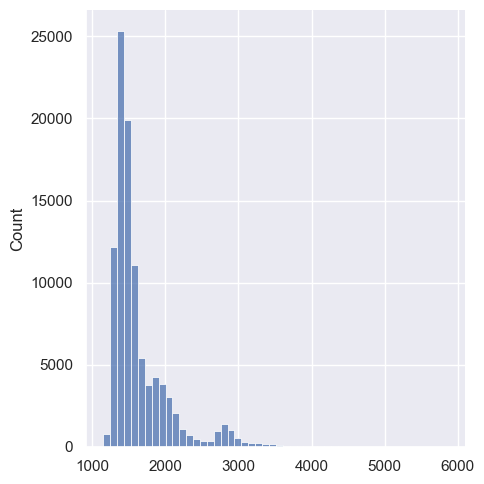

In [70]:
# Graficamos la muestra
sns.set_style('darkgrid')
sns.displot(serie_means, kind="hist", bins = 50)

In [71]:
# Teorema del limite central
asimetria_muestra = serie_means.skew()
kurtosis_muestra= serie_means.kurtosis()

print(f'Asimetría de la muestra: {asimetria_muestra}')
print(f'Kurtosis de la muestra: {kurtosis_muestra}')

Asimetría de la muestra: 2.3805253962699666
Kurtosis de la muestra: 6.891960641857867


In [72]:
# descripción de nuestra serie de medias
serie_means.describe().round(2)

count    100000.00
mean       1639.53
std         417.39
min        1155.12
25%        1389.89
50%        1487.60
75%        1727.66
max        5869.24
dtype: float64

In [73]:
# Rango de nuestra serie
print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')

Valor mínimo: 1155.1186311787071
Valor máximo: 5869.240304182509
Rango: 4714.121673003802


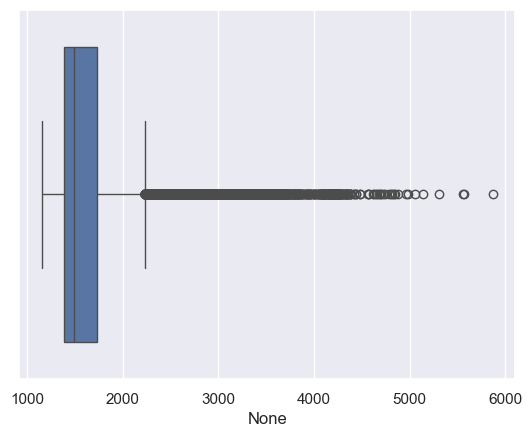

In [74]:
# Boxplot de la serie
sns.boxplot(x=serie_means);

In [75]:
# Intervalo de confianza
# Aplicado para quitar valores atípicos pero lo repasaremos con las muestras

limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)
     
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {boots_price.mean()} < {limite_superior}')


Intervalo de 95% confianza de la media: 1277.6113307984792 < 1637.101603465309 < 2891.661235741444


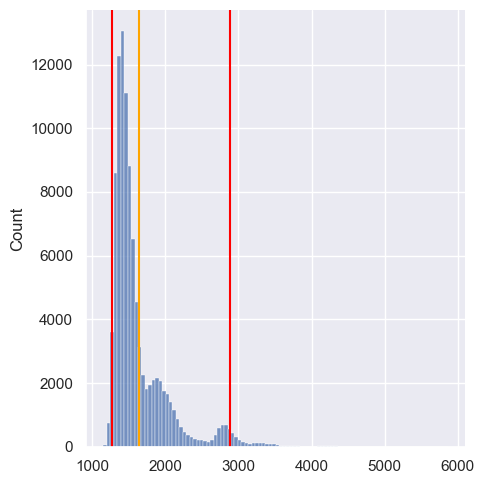

In [76]:
# Visualizamos nuestro grafico visualizando los limites y la media
sns.displot(serie_means, kind = "hist", bins = 100)
plt.axvline(limite_inferior, color = 'red')
plt.axvline(boots_price.mean(), color = 'orange')
plt.axvline(limite_superior, color = "red");

#### Datasets de entrenamiento y prueba

In [77]:
#Usamos el dataframe de filtrado al 95% y con el Indice de Desarrollo Social
df_airbnb_all_7.head()

neighbourhood        room_type  price  minimum_nights  \
id                                                                     
35797  Cuajimalpa de Morelos  Entire home/apt   3437               1   
61792             Cuauhtémoc     Private room   1031               2   
67703             Cuauhtémoc  Entire home/apt   1890               4   
70644               Coyoacán  Entire home/apt    737               5   
84500               Coyoacán  Entire home/apt   3179              10   

       number_of_reviews  availability_365       IDS  E_IDS_V  
id                                                             
35797                  0               363  0.842207        2  
61792                 63               180  0.848301        2  
67703                 47               307  0.848301        2  
70644                120               158  0.876103        2  
84500                  0                71  0.876103        2

In [78]:
# Eliminamos las columnas con valores no numericos
df_airbnb_all_7_onlynumbers = df_airbnb_all_7.drop(['neighbourhood', 'room_type'], axis =1)
df_airbnb_all_7_onlynumbers

price  minimum_nights  number_of_reviews  \
id                                                             
35797                3437               1                  0   
61792                1031               2                 63   
67703                1890               4                 47   
70644                 737               5                120   
84500                3179              10                  0   
...                   ...             ...                ...   
985673895001471605   1525               1                  0   
985676768542852342   1360               1                  0   
985758830966947800   2400               1                  0   
985775761856052521   3401               1                  0   
985780693129316227   1183               1                  0   

                    availability_365       IDS  E_IDS_V  
id                                                       
35797                            363  0.842207        2  
61792                            180  0.848301        2  
67703                            307  0.848301        2  
70644                            158  0.876103        2  
84500                             71  0.876103        2  
...                              ...       ...      ...  
985673895001471605               269  0.848301        2  
985676768542852342               356  0.848301        2  
985758830966947800               352  0.848301        2  
985775761856052521               355  0.894336        3  
985780693129316227               287  0.848301        2  

[24999 rows x 6 columns]

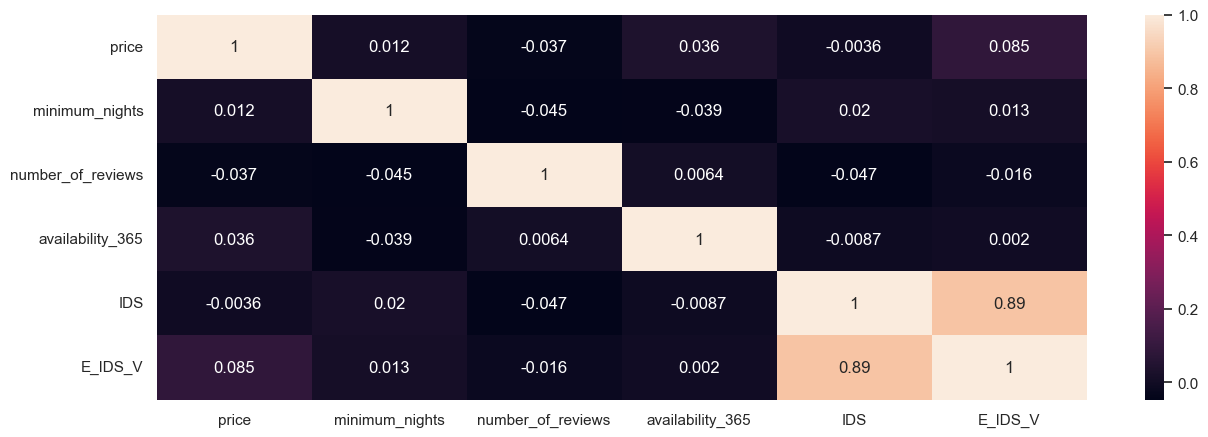

In [79]:
# De este nuevo dataframe obtenemos el mapa de calor
plt.figure(figsize=(15, 5))
sns.heatmap(df_airbnb_all_7_onlynumbers.corr(), annot=True);

In [80]:
# Empezamos a entrenar al modelo para tratar de adivinar el precio dependiendo la disponibilidad y el IDS
from sklearn.model_selection import train_test_split

X = df_airbnb_all_7_onlynumbers[['availability_365', 'IDS']]
y = df_airbnb_all_7_onlynumbers['price']

In [81]:
# Tomamos en cuenta un tamaño de dataset de prueba del 25% y que revolverá nuestro dataset original previo a la división
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [84]:
# Se hace el modelo con los datos de entrenamiento
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_training, y_training)

LinearRegression()

In [85]:
# Evaluación del modelo con los datos de prueba
el_r2 = lr.score(X_test, y_test).round(6)
print(f'El coeficiente de determinación o R2 es de: {el_r2}')

AttributeError: 'float' object has no attribute 'round'

#### Validación cruzada

In [196]:
# Iniciamos la validación haciendo las importaciones necesarias y algunas definiciones
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

scores = cross_validate(lr, X, y, scoring='r2')
scores

{'fit_time': array([0.00400019, 0.00600147, 0.00399828, 0.00401592, 0.0030694 ]),
 'score_time': array([0.00300217, 0.00299668, 0.00200438, 0.00199795, 0.0019238 ]),
 'test_score': array([-0.00416449, -0.00861605, -0.00324066, -0.00651449, -0.00312308])}

In [197]:
# Obtenemos y desplegamos la evaluación del modelo usando el promedio y la desviación estándar de los scores obtenidos

variabilidad_m = (scores["test_score"].mean()).round(6)
margen_r2 = (scores["test_score"].std()).round(6)
ms_r2 = (variabilidad_m + margen_r2).round(6)
mi_r2 = (variabilidad_m - margen_r2).round(6)

print(f'Score del modelo: {variabilidad_m} +/- {margen_r2}')
print("_" * 120)
print("")
print(f'Esto significa que el modelo explica el {variabilidad_m * 100} % de la variabilidad en los datos.')
print(f'El valor +/- {margen_r2} indica que el R² se encuentra entre {ms_r2} y {mi_r2} con un 95% de confianza')

Score del modelo: -0.005132 +/- 0.002126
________________________________________________________________________________________________________________________

Esto significa que el modelo explica el -0.5132 % de la variabilidad en los datos.
El valor +/- 0.002126 indica que el R² se encuentra entre -0.003006 y -0.007258 con un 95% de confianza


## Visualización de Datos Avanzada

In [198]:
# Treemaps
#Usamos el dataframe de filtrado al 95% y con el Indice de Desarrollo Social
df_airbnb_all_7.head()

neighbourhood        room_type  price  minimum_nights  \
id                                                                     
35797  Cuajimalpa de Morelos  Entire home/apt   3437               1   
61792             Cuauhtémoc     Private room   1031               2   
67703             Cuauhtémoc  Entire home/apt   1890               4   
70644               Coyoacán  Entire home/apt    737               5   
84500               Coyoacán  Entire home/apt   3179              10   

       number_of_reviews  availability_365       IDS  E_IDS_V  
id                                                             
35797                  0               363  0.842207        2  
61792                 63               180  0.848301        2  
67703                 47               307  0.848301        2  
70644                120               158  0.876103        2  
84500                  0                71  0.876103        2

In [199]:
# Agrupamos nuestro dataframe df_airbnb_all_7
df_airbnb_7_grouped = df_airbnb_all_7.groupby('id')[['neighbourhood', 'room_type']].max()
df_airbnb_7_grouped.head()

neighbourhood        room_type
id                                           
35797  Cuajimalpa de Morelos  Entire home/apt
61792             Cuauhtémoc     Private room
67703             Cuauhtémoc  Entire home/apt
70644               Coyoacán  Entire home/apt
84500               Coyoacán  Entire home/apt

In [200]:
df_airbnb_7_grouped['count'] = 1

In [201]:
# Creamos un treemap que divide la muestra por Alcaldías y luego por tipo de habitación
fig = px.treemap(df_airbnb_7_grouped, path=['neighbourhood', 'room_type'], values='count')
fig.update_layout(width=1000, height=600, margin=dict(l=5, r=5, t=5, b=5))
fig.show()

In [202]:
# Hacemos el mismo treemap pero con el top 5 de alcaldías con mas prestadores del servicio de Airbnb
top_5_alcaldias = df_airbnb_7_grouped['neighbourhood'].value_counts().head(5)
df_top_5_alcaldias = df_airbnb_7_grouped[df_airbnb_7_grouped['neighbourhood'].isin(top_5_alcaldias.index)]
df_top_5_alcaldias.head()

neighbourhood        room_type  count
id                                            
61792       Cuauhtémoc     Private room      1
67703       Cuauhtémoc  Entire home/apt      1
70644         Coyoacán  Entire home/apt      1
84500         Coyoacán  Entire home/apt      1
107078  Miguel Hidalgo  Entire home/apt      1

In [203]:
# desplegamos el treemap del top 5
fig = px.treemap(df_top_5_alcaldias, path=['neighbourhood', 'room_type'], values='count')
fig.update_layout(width=1000, height=600, margin=dict(l=5, r=5, t=5, b=5))
fig.show()

In [204]:
# Repetimos el ptimer treemap pero primero lo dividimos por tipo de habitación  y luego por Alcaldías
fig = px.treemap(df_airbnb_7_grouped, path=['room_type', 'neighbourhood'], values='count')
fig.update_layout(width=1000, height=600, margin=dict(l=5, r=5, t=5, b=5))
fig.show()

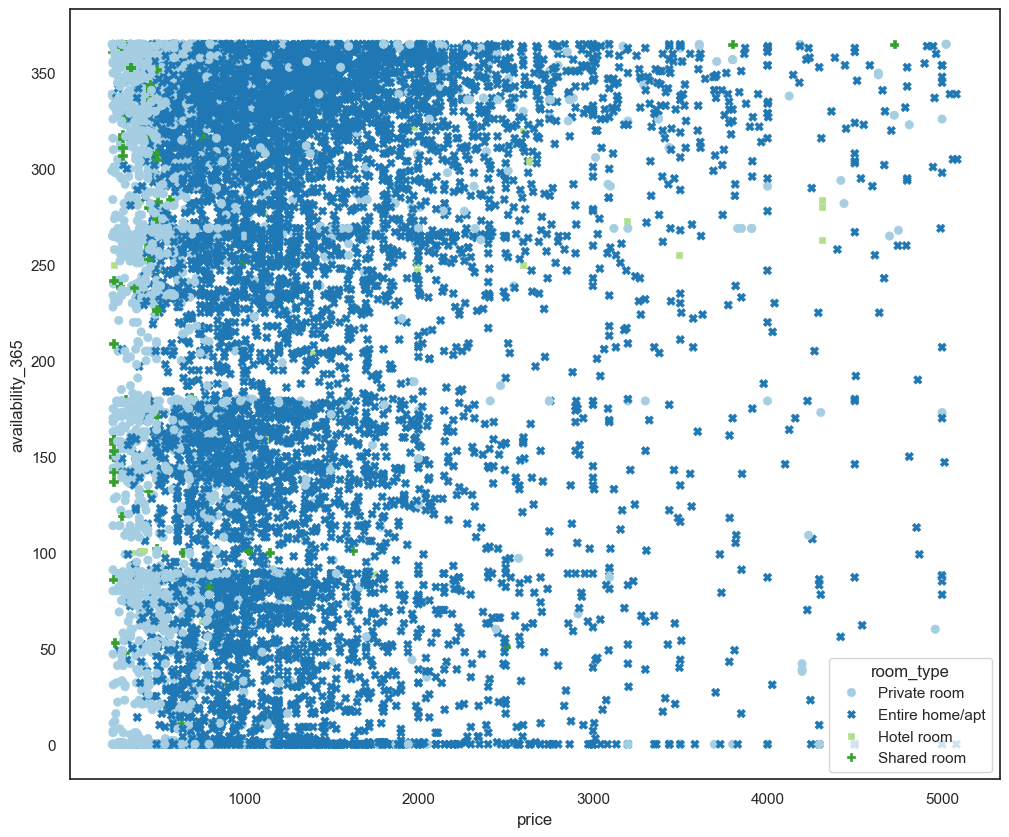

In [205]:
# Veremos la distribución de los prestadores de servicios en Cuauhtémoc segun su precio y disponibilidad,
# y separados por tipo de habitación

df_airbnb_7_price_grouped = df_airbnb_all_7.groupby('id')[['neighbourhood', 'room_type', 'price', 'availability_365']].max()
# df_airbnb_7_price_grouped.head()


airbnb_cuauhtemoc = df_airbnb_7_price_grouped[df_airbnb_7_price_grouped['neighbourhood'] == 'Cuauhtémoc']
# airbnb_cuauhtemoc.head()

plt.figure(figsize=(12, 10))
sns.set_style("white")
sns.scatterplot(x=airbnb_cuauhtemoc['price'], y=airbnb_cuauhtemoc['availability_365'], hue =airbnb_cuauhtemoc['room_type'], style= airbnb_cuauhtemoc['room_type'], palette = 'Paired', marker = "x");


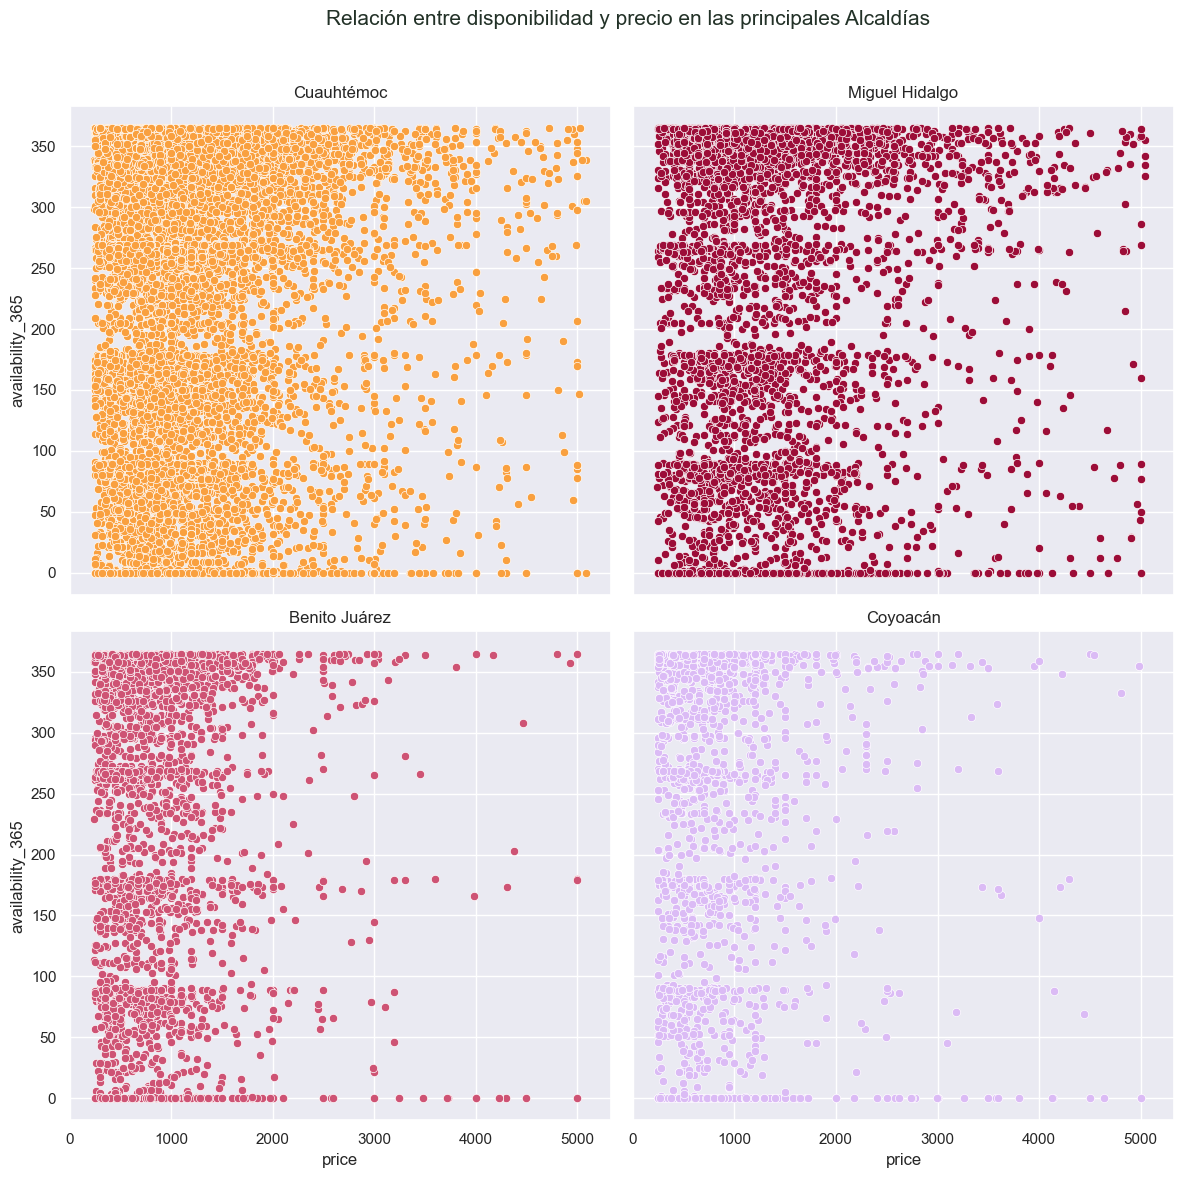

In [206]:
# Scatterplots con variables condicionantes
# Queremos visualizar la información de las cuatro alcalcaldia scon mas prestadores del servicio
df_all_grouped = df_airbnb_all_7.groupby('id')[['price', 'availability_365', 'neighbourhood']].max()
df_top4 = df_all_grouped[df_all_grouped['neighbourhood'].isin(['Cuauhtémoc', 'Miguel Hidalgo', 'Benito Juárez', 'Coyoacán'])]

# Especificamos la gráfica con los scatterplots con la información de cada alcaldía por separado
sns.set_style("darkgrid")
palette = ["#223127","#9c0d38","#ce5374","#dbbbf5","#F9A03F"]

# Creamos un dataframe por cada Alcaldía
df_airbnb_cuauhtemoc = df_top4[df_top4['neighbourhood'] == 'Cuauhtémoc']
df_airbnb_hidalgo = df_top4[df_top4['neighbourhood'] == 'Miguel Hidalgo']
df_airbnb_juarez = df_top4[df_top4['neighbourhood'] == 'Benito Juárez']
df_airbnb_coyoacan = df_top4[df_top4['neighbourhood'] == 'Coyoacán']

# Declaramos los axes
fig = plt.figure(figsize=(12, 12))
axes = fig.subplots(2, 2, sharex=True, sharey=True)
axes[0, 0].set_title('Cuauhtémoc')
axes[0, 1].set_title('Miguel Hidalgo')
axes[1, 0].set_title('Benito Juárez')
axes[1, 1].set_title('Coyoacán')
fig.suptitle('Relación entre disponibilidad y precio en las principales Alcaldías', fontsize=15, c=palette[0], x=0.53)

# Definimos las Gráficas
sns.scatterplot(x=df_airbnb_cuauhtemoc['price'], y=df_airbnb_cuauhtemoc['availability_365'], ax=axes[0, 0], color=palette[4])
sns.scatterplot(x=df_airbnb_hidalgo['price'], y=df_airbnb_hidalgo['availability_365'], ax=axes[0, 1], color=palette[1])
sns.scatterplot(x=df_airbnb_juarez['price'], y=df_airbnb_juarez['availability_365'], ax=axes[1, 0], color=palette[2])
sns.scatterplot(x=df_airbnb_coyoacan['price'], y=df_airbnb_coyoacan['availability_365'], ax=axes[1, 1], color=palette[3]);

# Colocamos las gráficas
plt.tight_layout()
plt.subplots_adjust(top=0.9)

(0.0, 365.0)

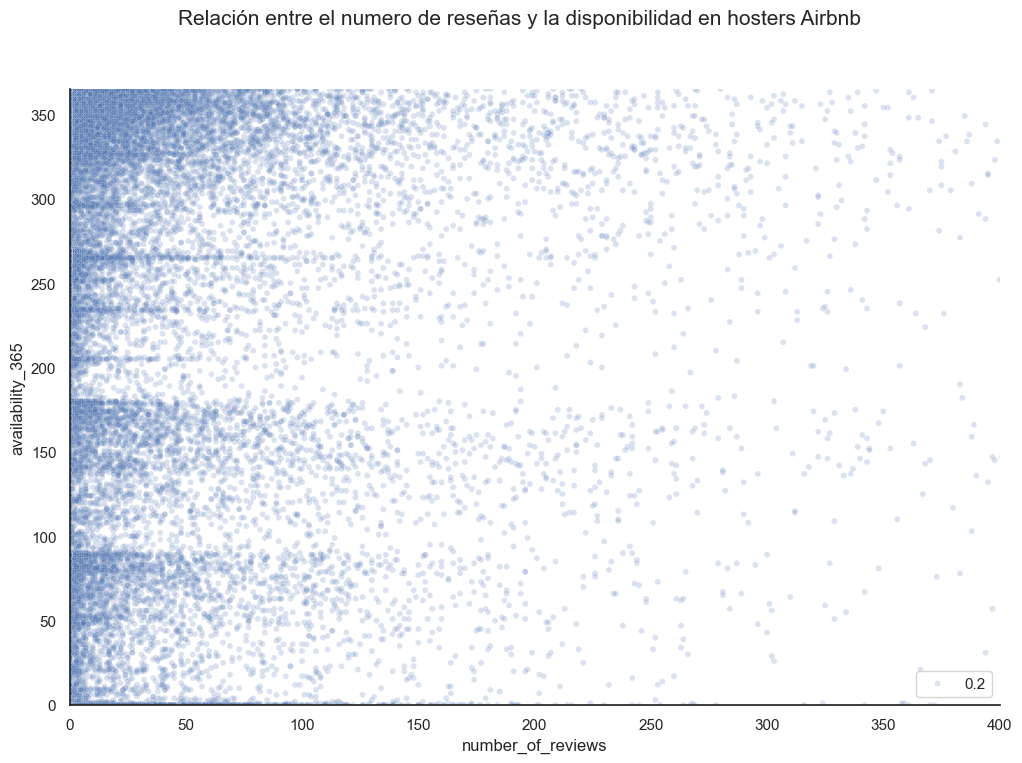

In [207]:
# Binnings Hexagonales
# Visualizaremos la relación disponibilidad vs numero de reseñas en del dataframe df_airbnb_all_7

# Hacemos la agrupación por id considerando solo esos dos elementos
df_ava_vs_nr = df_airbnb_all_7.groupby('id')[['availability_365','number_of_reviews']].max()


# Hacemos la gráfica de dispersión

    # Espicificamos las principales caracteristicas del gráfico
sns.set_style('white')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()

   # Definimos los datos de las X y las Y, y le damos titulo al gráfico
sns.scatterplot(x=df_ava_vs_nr['number_of_reviews'], y=df_ava_vs_nr['availability_365'], size= 0.2, alpha = 0.2, ax=ax)
fig.suptitle('Relación entre el numero de reseñas y la disponibilidad en hosters Airbnb', fontsize=15)

    # Agregamos algunos parametroa los ejes
ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")

    #  Asignamos limites a las X y a las Y
ax.set_xlim(0, 400)
ax.set_ylim(0,365)

# g=sns.jointplot(x='height', y='weight', data=df_ava_vs_nr, kind='hex', ratio=10, joint_kws={'gridsize': 50})

# g = sns.scatterplot(x=df_ava_vs_nr['number_of_reviews'], y=df_ava_vs_nr['availability_365'])

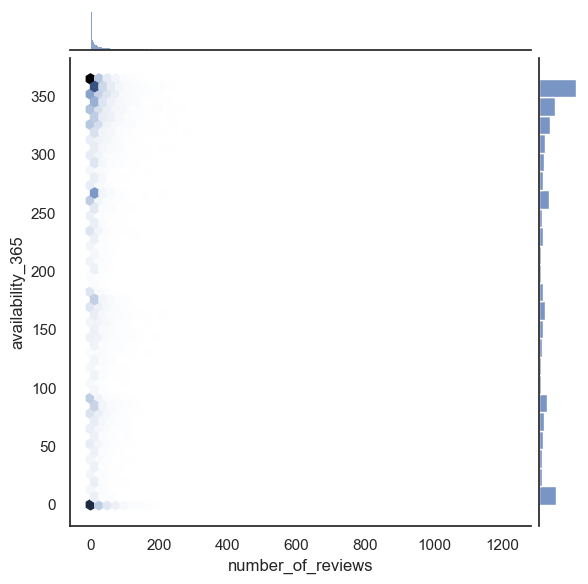

In [208]:
# Binning hexadecimal

g=sns.jointplot(x='number_of_reviews', y='availability_365', data=df_ava_vs_nr, kind='hex', ratio=10, joint_kws={'gridsize': 50})


In [209]:
# Mapas cloropléticos - PENDIENTE

    # Obtenemos el mapa
fjson = 'https://raw.githubusercontent.com/liazamudio/datasets/main/limite-de-las-alcaldas.json'

    # Obtenemos los datos
# fcsv = path + 'listings-airbnb-mex.csv' no se usará, Se usará el dataframe df_airbnb_all_5
df_airbnb_all_5.index.name = 'neighbourhood'
df_airbnb_f_price = df_airbnb_all_5.drop(['count', 'minimum_nights', 'number_of_reviews', 'availability_365', 'IDS', 'E_IDS_V'], axis =1)

alcaldia_geo = fjson
alcaldia_data = df_airbnb_f_price       # alcaldia_data = pd.read_csv(alcaldia_price)

# alcaldia_data

m = folium.Map(location=[0, 0], zoom_start=3, width='60%', height='60%')

folium.Choropleth(
    geo_data = alcaldia_geo,
    name = 'choropleth',
    data = alcaldia_data,
    columns=['neighbourhood', 'price'],
    key_on='features.properties.NOMGEO',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Precios'
).add_to(m)

folium.LayerControl().add_to(m)

m

KeyError: "None of ['neighbourhood'] are in the columns"

#### Gráficas de barras apiladas

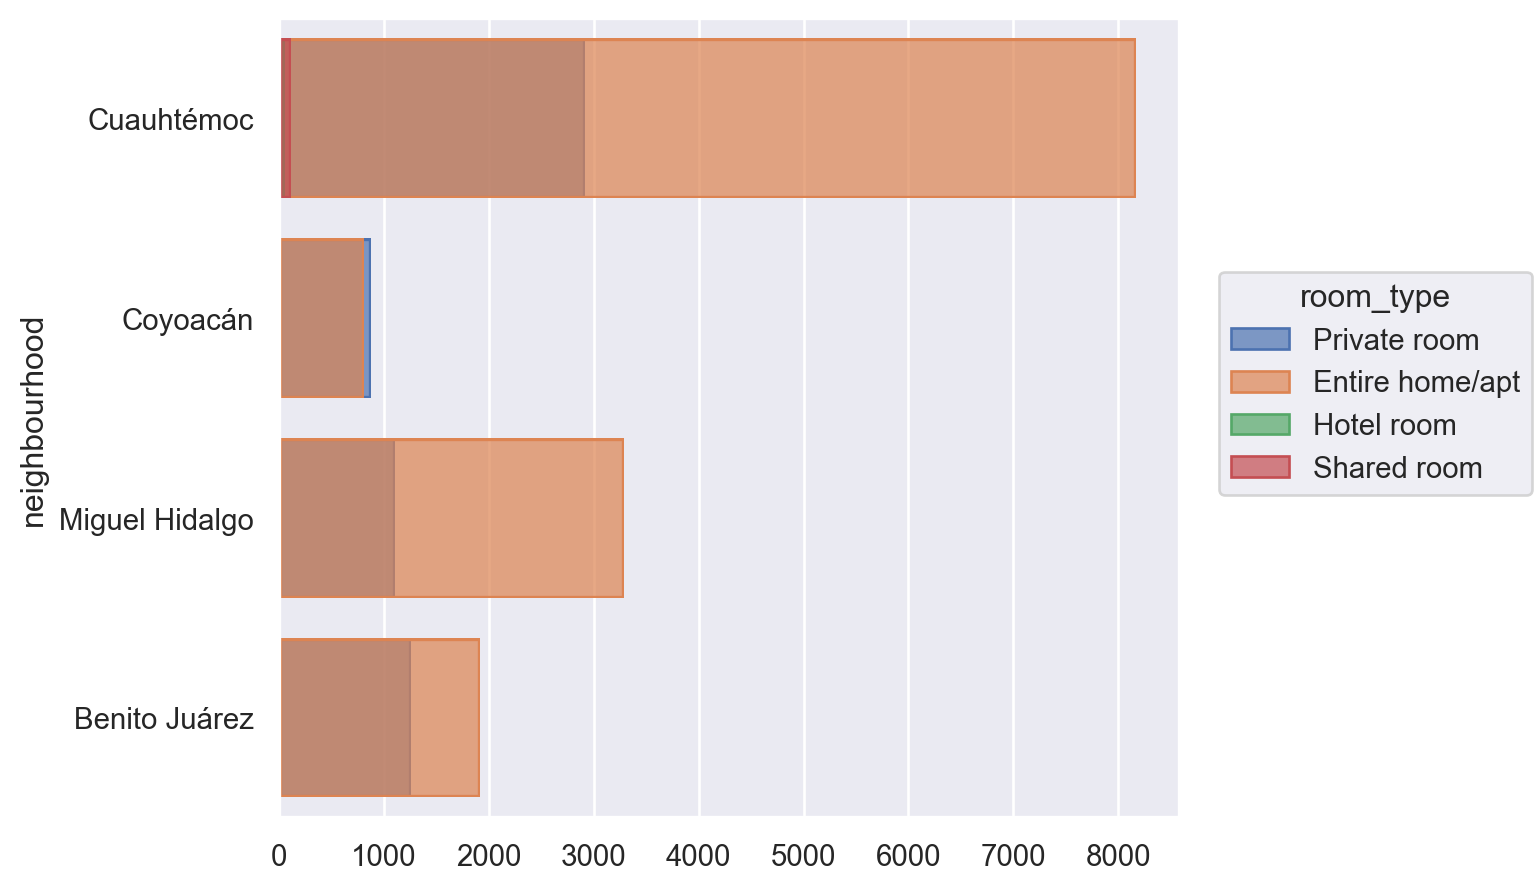

<Figure size 500x500 with 0 Axes>

In [210]:
# Consideraremos el dataframe df_top4  creado en los Scatterplots con variables condicionantes
# df_top4 = df_all_grouped[df_all_grouped['neighbourhood'].isin(['Cuauhtémoc', 'Miguel Hidalgo', 'Benito Juárez', 'Coyoacán'])]

# Hacemos el conteo
value_counts_alcaldías = df_airbnb_all_7['neighbourhood'].value_counts()
# value_counts_alcaldías

# Layouts

# Hacemos la segmentación por tipo de habitación de las principales Alcaldías
df_airbnb_all_7['count'] = 1
df_airbnb_4p = df_airbnb_all_7[df_airbnb_all_7['neighbourhood'].isin(['Cuauhtémoc', 'Miguel Hidalgo', 'Benito Juárez', 'Coyoacán'])]
counts_alc_room = df_airbnb_4p.groupby(['neighbourhood', 'room_type'])['count'].sum()
counts_alc_room = counts_alc_room.unstack(1)
# counts_alc_room
counts_alc_room = counts_alc_room.fillna(0)

# Graficamos
fig = plt.figure(figsize=(5, 5))
df1 = df_airbnb_all_7[df_airbnb_all_7['neighbourhood'].isin(['Cuauhtémoc', 'Miguel Hidalgo', 'Benito Juárez', 'Coyoacán'])]
# so.Plot(df1, x='neighbourhood', color='room_type').add(so.Bar(), so.Hist())
so.Plot(df1, y='neighbourhood', color='room_type').add(so.Bar(), so.Hist())


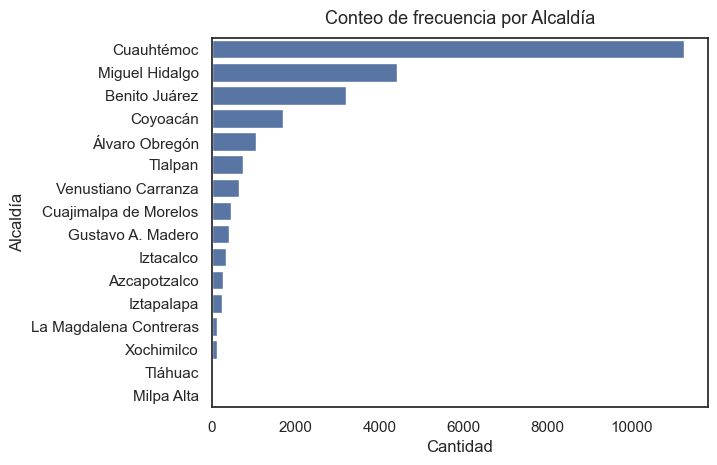

In [211]:
# Conteo total sin división por tipo de habitación y de todas las Alcaldías
fig = plt.figure()
ax = fig.add_subplot()
#grafica
sns.barplot(x=value_counts_alcaldías, y=value_counts_alcaldías.index, ax=ax);

ax.set_xlabel('Cantidad')
ax.set_ylabel('Alcaldía')
ax.set_title('Conteo de frecuencia por Alcaldía', fontsize=13, pad=10);

## Pruebas A/B y Procesamiento de Lenguaje Natural

#### Pruebas A/B

In [212]:
# Checar el dataset df_airbnb_cdmx_cc_rl hasta Introducción a Machine Learning: Clasificación No Supervisada y Supervisada
# No aplica

#### Procesamiento de Lenguaje Natural

In [214]:
# Regex - Utilizaremos en dataframe df_airbnb_cdmx_95
df_airbnb_cdmx_95.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [215]:
# df_airbnb_grouped_hostid = df_airbnb_cdmx_95.groupby('host_id')['name', 'host_name', 'neighbourhood'].max()
df_airbnb_grouped_hostid = df_airbnb_cdmx_95.groupby('host_id')['name'].max()

df_airbnb_grouped_hostid

host_id
7365         Condo in Mexico City · ★4.93 · 1 bedroom · 2 b...
24858        Rental unit in Hipodromo · ★5.0 · 1 bedroom · ...
33457        Loft in Mexico City · ★4.74 · 1 bedroom · 2 be...
36836        Loft in Colonia Juárez · ★4.78 · 1 bedroom · 1...
60079        Rental unit in Mexico City · ★4.87 · 2 bedroom...
                                   ...                        
538058657    Rental unit in Mexico City · ★New · 1 bedroom ...
538069034    Rental unit in Mexico City · ★New · 1 bedroom ...
538088702    Rental unit in Mexico City · ★New · 1 bedroom ...
538100136    Home in Mexico City · ★New · 3 bedrooms · 3 be...
538290721    Hotel in Mexico City · ★New · 1 bedroom · 1 be...
Name: name, Length: 11831, dtype: object

In [216]:
tam_df_airbnb_cdmx_95 = df_airbnb_cdmx_95.shape[0]
tam_df_grouped_hostid = df_airbnb_grouped_hostid.shape[0]
print(f'El dataframe original tiene {tam_df_airbnb_cdmx_95} filas y el dataframe filtrado tiene {tam_df_grouped_hostid} filas.')


El dataframe original tiene 24999 filas y el dataframe filtrado tiene 11831 filas.


In [217]:
# Busqueda de registros que contengan una palabra (home) en el 'name'
df_airbnb_grouped_hostid[df_airbnb_grouped_hostid.str.contains('home', case=False)]

host_id
285373       Home in Mexico City · ★4.96 · 1 bedroom · 1 be...
299558       Home in Mexico City · ★4.92 · 1 bedroom · 1 be...
340030       Tiny home in Mexico City · 1 bedroom · 1 bed ·...
351954       Home in Mexico City · ★4.96 · 2 bedrooms · 2 b...
457875       Home in Mexico City · 3 bedrooms · 3 beds · 3....
                                   ...                        
536131196    Home in Mexico City · ★New · 3 bedrooms · 3 be...
536837592    Home in Cuauhtémoc · ★New · 2 bedrooms · 2 bed...
537449140    Home in Mexico City · ★4.29 · 8 bedrooms · 9 b...
537973837    Home in Mexico City · ★New · 1 bedroom · 1 bed...
538100136    Home in Mexico City · ★New · 3 bedrooms · 3 be...
Name: name, Length: 1230, dtype: object

In [218]:
# Busqueda de registros que no contengan palabra (home) en el 'name'
df_airbnb_grouped_hostid[~df_airbnb_grouped_hostid.str.contains('home', case=False)]

host_id
7365         Condo in Mexico City · ★4.93 · 1 bedroom · 2 b...
24858        Rental unit in Hipodromo · ★5.0 · 1 bedroom · ...
33457        Loft in Mexico City · ★4.74 · 1 bedroom · 2 be...
36836        Loft in Colonia Juárez · ★4.78 · 1 bedroom · 1...
60079        Rental unit in Mexico City · ★4.87 · 2 bedroom...
                                   ...                        
537972295    Rental unit in Mexico City · ★New · 3 bedrooms...
538058657    Rental unit in Mexico City · ★New · 1 bedroom ...
538069034    Rental unit in Mexico City · ★New · 1 bedroom ...
538088702    Rental unit in Mexico City · ★New · 1 bedroom ...
538290721    Hotel in Mexico City · ★New · 1 bedroom · 1 be...
Name: name, Length: 10601, dtype: object

In [219]:
# Busqueda de registros que contengan numeros (0 al 9) en el 'name'
df_airbnb_grouped_hostid[df_airbnb_grouped_hostid.str.contains('[0-9]')]

host_id
7365         Condo in Mexico City · ★4.93 · 1 bedroom · 2 b...
24858        Rental unit in Hipodromo · ★5.0 · 1 bedroom · ...
33457        Loft in Mexico City · ★4.74 · 1 bedroom · 2 be...
36836        Loft in Colonia Juárez · ★4.78 · 1 bedroom · 1...
60079        Rental unit in Mexico City · ★4.87 · 2 bedroom...
                                   ...                        
538058657    Rental unit in Mexico City · ★New · 1 bedroom ...
538069034    Rental unit in Mexico City · ★New · 1 bedroom ...
538088702    Rental unit in Mexico City · ★New · 1 bedroom ...
538100136    Home in Mexico City · ★New · 3 bedrooms · 3 be...
538290721    Hotel in Mexico City · ★New · 1 bedroom · 1 be...
Name: name, Length: 11831, dtype: object

In [220]:
# Busqueda de registros con uno o más números seguidos por una o más letras
df_airbnb_grouped_hostid[~df_airbnb_grouped_hostid.str.contains('[0-9]+[a-z]+', case=False)]

host_id
7365         Condo in Mexico City · ★4.93 · 1 bedroom · 2 b...
24858        Rental unit in Hipodromo · ★5.0 · 1 bedroom · ...
33457        Loft in Mexico City · ★4.74 · 1 bedroom · 2 be...
36836        Loft in Colonia Juárez · ★4.78 · 1 bedroom · 1...
60079        Rental unit in Mexico City · ★4.87 · 2 bedroom...
                                   ...                        
538058657    Rental unit in Mexico City · ★New · 1 bedroom ...
538069034    Rental unit in Mexico City · ★New · 1 bedroom ...
538088702    Rental unit in Mexico City · ★New · 1 bedroom ...
538100136    Home in Mexico City · ★New · 3 bedrooms · 3 be...
538290721    Hotel in Mexico City · ★New · 1 bedroom · 1 be...
Name: name, Length: 11831, dtype: object

In [221]:
# Busqueda de registros con uno o más números seguidos por las letras ' bed'
df_airbnb_grouped_hostid[df_airbnb_grouped_hostid.str.contains('[0-9] bed', case=False)]

host_id
7365         Condo in Mexico City · ★4.93 · 1 bedroom · 2 b...
24858        Rental unit in Hipodromo · ★5.0 · 1 bedroom · ...
33457        Loft in Mexico City · ★4.74 · 1 bedroom · 2 be...
36836        Loft in Colonia Juárez · ★4.78 · 1 bedroom · 1...
60079        Rental unit in Mexico City · ★4.87 · 2 bedroom...
                                   ...                        
538058657    Rental unit in Mexico City · ★New · 1 bedroom ...
538069034    Rental unit in Mexico City · ★New · 1 bedroom ...
538088702    Rental unit in Mexico City · ★New · 1 bedroom ...
538100136    Home in Mexico City · ★New · 3 bedrooms · 3 be...
538290721    Hotel in Mexico City · ★New · 1 bedroom · 1 be...
Name: name, Length: 11823, dtype: object

In [222]:
# Busqueda de textos que comiencen con la palabra 'Loft'
df_airbnb_grouped_hostid[df_airbnb_grouped_hostid.str.contains('^Loft', case=False)]

host_id
33457        Loft in Mexico City · ★4.74 · 1 bedroom · 2 be...
36836        Loft in Colonia Juárez · ★4.78 · 1 bedroom · 1...
276297       Loft in Mexico City · ★4.92 · 1 bedroom · 1 be...
355243       Loft in Mexico City · ★4.91 · 1 bedroom · 2 be...
407096       Loft in Mexico City · ★4.90 · 1 bedroom · 1 be...
                                   ...                        
523966495     Loft in Mexico City · 1 bedroom · 1 bed · 1 bath
526123832    Loft in Mexico City · ★5.0 · 1 bedroom · 1 bed...
527961756    Loft in Mexico City · ★New · 1 bedroom · 3 bed...
530081768    Loft in Mexico City · ★New · 1 bedroom · 2 bed...
535059560    Loft in Mexico City · ★New · 1 bedroom · 1 bed...
Name: name, Length: 665, dtype: object

In [223]:
# Busqueda de textos que terminen con la palabra 'bedroom' y tres puntos (...)
df_airbnb_grouped_hostid[df_airbnb_grouped_hostid.str.contains('bedroom...$', case=False)]

Series([], Name: name, dtype: object)

In [224]:
# Busqueda de textos que contengan la palabra 'Juárez' o 'Roma'
df_airbnb_grouped_hostid[df_airbnb_grouped_hostid.str.contains('\sJuárez\s|\sRoma\s', case=False)]

host_id
36836        Loft in Colonia Juárez · ★4.78 · 1 bedroom · 1...
1007542      Rental unit in Juárez · ★4.85 · 2 bedrooms · 2...
1453242      Rental unit in Benito Juárez · ★4.75 · 1 bedro...
1498570      Rental unit in Colonia Roma Sur, Cuauhtémoc · ...
1670032      Condo in Roma Norte · ★4.75 · 2 bedrooms · 2 b...
                                   ...                        
506921584    Rental unit in Colonia Juárez · ★4.88 · 2 bedr...
507379747    Rental unit in Juárez · ★5.0 · 1 bedroom · 1 b...
513302976    Condo in Juárez · ★5.0 · 1 bedroom · 2 beds · ...
513676588    Rental unit in Juárez · 4 bedrooms · 3 beds · ...
532609461    Rental unit in Juárez · ★New · Studio · 1 bed ...
Name: name, Length: 169, dtype: object

#### Nltk Text

In [225]:
# Seguiremos con el dataframe df_airbnb_cdmx_95 y volveremos a utilizar el df derivado df_airbnb_grouped_hostid

# No requiere limpiezar de los textos
#
# Separamos cada oración en palabras
tokenized = df_airbnb_grouped_hostid.apply(nltk.word_tokenize)

In [226]:
# Sumamos todas las listas para obtener una lista con todas las palabras en nuestro conjunto de datos y Creamos un objeto Text
all_words = tokenized.sum()
text = nltk.Text(all_words)
text

<Text: Condo in Mexico City · ★4.93 · 1...>

In [227]:
# Buscamos texto que concuerde con 'unit'
text.concordance('unit', lines=20)

Displaying 20 of 6150 matches:
 bedroom · 2 beds · 1.5 baths Rental unit in Hipodromo · ★5.0 · 1 bedroom · 1 
1 bedroom · 1 bed · 1.5 baths Rental unit in Mexico City · ★4.87 · 2 bedrooms 
· 2 bedrooms · 1 bed · 1 bath Rental unit in Mexico City · ★4.85 · 2 bedrooms 
2 bedrooms · 2 beds · 2 baths Rental unit in Mexico City · ★4.67 · 3 bedrooms 
3 bedrooms · 3 beds · 2 baths Rental unit in Mexico City · ★4.80 · 2 bedrooms 
2 bedrooms · 2 beds · 2 baths Rental unit in Mexico City · 1 bedroom · 1 bed ·
 · 1 bedroom · 1 bed · 1 bath Rental unit in Mexico City · ★New · 1 bedroom · 
 bedroom · 2 beds · 2.5 baths Rental unit in Mexico City · 3 bedrooms · 2 beds
3 bedrooms · 2 beds · 2 baths Rental unit in Mexico City · 1 bedroom · 1 bed ·
 · 1 bedroom · 1 bed · 1 bath Rental unit in Mexico City · ★5.0 · 2 bedrooms ·
 2 bedrooms · 3 beds · 1 bath Rental unit in Mexico City · ★4.92 · 2 bedrooms 
 2 bedrooms · 2 beds · 1 bath Rental unit in Mexico City · ★4.98 · 1 bedroom ·
 · 1 bedroom · 1 bed 

In [229]:
# Buscamos palabras que aparecen en contextos similares al argumento 'México'
text.similar('México')

mexico juárez tlalpan centro coyoacan condesa cdmx morelos cuauhtémoc
nezahualcóyotl coyacán coyoacán nápoles buenavista 墨西哥城 bedroom
hipodromo df de polanco


In [230]:
# Probamos con una variante 'Mexico'
text.similar('Mexico')

méxico juárez morelos tlalpan centro coyoacan cuauhtémoc condesa
nezahualcóyotl coyacán coyoacán nápoles buenavista cdmx hipodromo df
de polanco huixquilucan tepepan


In [231]:
# Buscamos textos que concuerden con el argumento 'Coyoacán' en 10 líneas
text.concordance('Coyoacán', lines = 10)

Displaying 9 of 9 matches:
al unit in Barrio de la Conchita , Coyoacán , Ciudad de México · ★4.97 · 3 bed
5 baths Loft in Ciudad de México , Coyoacán · ★4.90 · 1 bedroom · 3 beds · 1 b
.5 baths Castle in La Candelaria , Coyoacán · ★4.72 · 1 bedroom · 1 bed · 1.5 
d bath Rental unit in Del Carmen , Coyoacán · ★4.90 · 1 bedroom · 1 bed · 1 ba
· 1 bed · 1.5 baths Guest suite in COYOACÁN · 1 bedroom · 2 beds · 1 private b
s · 3 beds · 1 bath Guest suite in Coyoacán · ★4.47 · 2 bedrooms · 2 beds · 1 
 · 2 beds · 2 baths Rental unit in Coyoacán · ★4.65 · 3 bedrooms · 3 beds · 1 
o · 1 bed · 1 private bath Home in Coyoacán · ★4.91 · 3 bedrooms · 5 beds · 2.
iced apartment in Santa Catarina , Coyoacán · ★4.96 · 2 bedrooms · 2 beds · 1 


In [237]:
#Buscamos contextos dos o más palabras
text.common_contexts(['2', 'beds'])

('The following word(s) were not found:', '2 beds')


In [269]:
# Riqueza léxica del dataframe
palabras_unicas = (len(set(text)) / len(text))
print(f'Tenemos una riqueza léxica del dataframe del {palabras_unicas * 100:.5f} %, que es el porcentaje de palabras únicas')

Tenemos una riqueza léxica del dataframe del 0.23689 %, que es el porcentaje de palabras únicas


In [249]:
# Las colocaciones son pares de palabras (bigramas) que son inusualmente comunes en nuestro conjunto de datos
text.collocations(num=10, window_size=10)

Mexico Mexico; City City; City Mexico; Mexico bath; Mexico unit;
Rental unit; Mexico Rental; City unit; bedroom City; City Rental


In [254]:
# Separamos cada oración en palabras
tokenized = df_airbnb_grouped_hostid.apply(nltk.word_tokenize)
tokenized

host_id
7365         [Condo, in, Mexico, City, ·, ★4.93, ·, 1, bedr...
24858        [Rental, unit, in, Hipodromo, ·, ★5.0, ·, 1, b...
33457        [Loft, in, Mexico, City, ·, ★4.74, ·, 1, bedro...
36836        [Loft, in, Colonia, Juárez, ·, ★4.78, ·, 1, be...
60079        [Rental, unit, in, Mexico, City, ·, ★4.87, ·, ...
                                   ...                        
538058657    [Rental, unit, in, Mexico, City, ·, ★New, ·, 1...
538069034    [Rental, unit, in, Mexico, City, ·, ★New, ·, 1...
538088702    [Rental, unit, in, Mexico, City, ·, ★New, ·, 1...
538100136    [Home, in, Mexico, City, ·, ★New, ·, 3, bedroo...
538290721    [Hotel, in, Mexico, City, ·, ★New, ·, 1, bedro...
Name: name, Length: 11831, dtype: object

In [256]:
# Analizaremos la distribución de frecuencia de las 20 palabras mas utilizadas
all_words = tokenized.sum()
freq_dist = nltk.FreqDist(all_words)
freq_dist.most_common(20)

[('·', 44554),
 ('1', 19335),
 ('in', 11831),
 ('Mexico', 11143),
 ('City', 11120),
 ('2', 9823),
 ('bath', 7274),
 ('bedroom', 6552),
 ('beds', 6205),
 ('Rental', 6150),
 ('unit', 6150),
 ('bed', 5508),
 ('bedrooms', 5060),
 ('baths', 4527),
 ('3', 2843),
 ('Condo', 2119),
 ('★5.0', 2048),
 ('shared', 1897),
 ('private', 1241),
 ('Home', 1082)]

In [258]:
from nltk.corpus import stopwords

In [259]:
# debido a que el dataframe esta en ingés, eliminaremos las stopwords ene se idioma. Acualizamos nuestro registro de palabras
english_stop_words = stopwords.words('english')
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]
freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

In [260]:
# Volvemos a visalizar la frecuencia de las palabras
freq_dist_no_stop_words.most_common(20)

[('·', 44554),
 ('1', 19335),
 ('Mexico', 11143),
 ('City', 11120),
 ('2', 9823),
 ('bath', 7274),
 ('bedroom', 6552),
 ('beds', 6205),
 ('Rental', 6150),
 ('unit', 6150),
 ('bed', 5508),
 ('bedrooms', 5060),
 ('baths', 4527),
 ('3', 2843),
 ('Condo', 2119),
 ('★5.0', 2048),
 ('shared', 1897),
 ('private', 1241),
 ('Home', 1082),
 ('1.5', 1054)]

In [262]:
# Consultamos la cantidad de palabras, excepto las stopwords
palabras_sin_sw = len(all_words_except_stop_words)
print(f'Excluyendo las stop words, tenemos un total de {palabras_sin_sw} palabras.')

Excluyendo las stop words, tenemos un total de 170432 palabras.


In [270]:
# Conteo de una palabra y porcentaje de aparición
palabra_c = "Coyoacán"
porce_pal = (100 * freq_dist_no_stop_words[palabra_c] / len(all_words_except_stop_words))
print(f'La palabra {palabra_c} tiene un porcentaje de aparición del {porce_pal:.5f}%.')

La palabra Coyoacán tiene un porcentaje de aparición del 0.00469%.


C:\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 9733 (\N{BLACK STAR}) missing from current font.



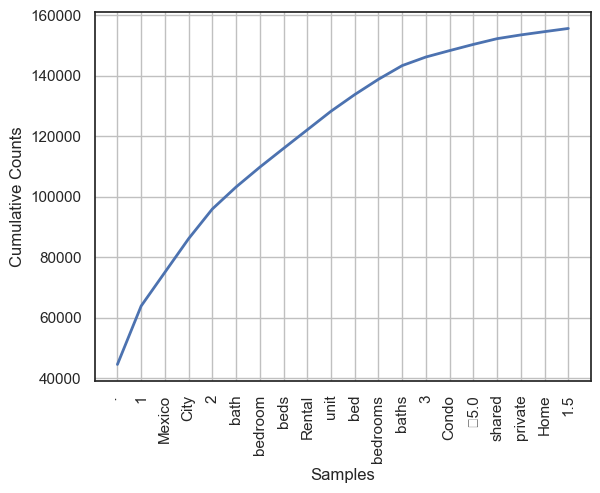

In [271]:
# Analizaremos la proporción del text que está siendo utilizada por las 20 palabras más comunes
freq_dist_no_stop_words.plot(20, cumulative=True);

In [272]:
# Algunas palabras que sólo aparecen una sola vez

freq_dist_no_stop_words.hapaxes()[:20]

['delegación',
 'CONDESA',
 'Anáhuac',
 'Social',
 'Reform',
 'Barrio',
 'la',
 'Conchita',
 '★3.27',
 'city',
 'C.P',
 '06060',
 'Hipódromo',
 'Pensador',
 'Mexicano',
 'Progreso',
 'tizapan',
 'Vista',
 'Hermosa',
 'Huixquilucan']

In [273]:
# Palabras largas
unique = set(all_words_except_stop_words)
unique_series = pd.Series(list(unique))
unique_series

0            Ciudad
1          Shipping
2      Azcapotzalco
3              ★5.0
4           Capulín
           ...     
423           ★4.08
424             Sol
425           ★4.65
426              11
427      delegación
Length: 428, dtype: object

In [275]:
# palabras de 12 o mas caracteres
unique_series[unique_series.str.len() > 12]

375    Nezahualcóyotl
dtype: object

In [277]:
# Palabras largas que son frecuentes
larger_than_10 = unique_series.str.len() > 9
is_frequent = unique_series.apply(lambda x: freq_dist_no_stop_words[x] > 5)
unique_series[larger_than_10 & is_frequent]

13     Guesthouse
215    particular
282    Buenavista
341    Cuauhtémoc
dtype: object

In [278]:
# Frecuencia de longitudes de nuestras palabras
freq_dist_lengths = nltk.FreqDist([len(w) for w in all_words_except_stop_words])
freq_dist_lengths.most_common()

[(1, 77954),
 (4, 36015),
 (6, 19951),
 (5, 13646),
 (7, 7940),
 (3, 7476),
 (8, 5998),
 (9, 941),
 (10, 353),
 (2, 144),
 (11, 7),
 (12, 4),
 (14, 3)]

## Introducción a Machine Learning: Clasificación No Supervisada y Supervisada

### Agrupamiento por K-Medias (Clasificación No Supervisada) 

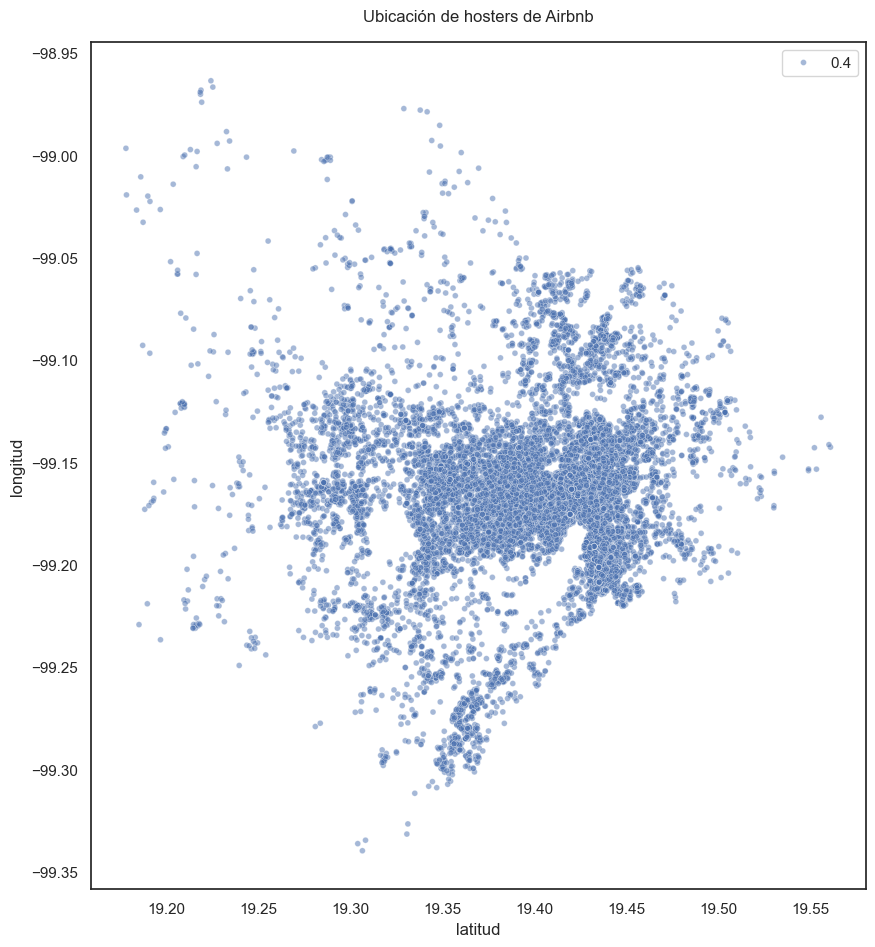

In [300]:
# Utilizaremos en dataframe original (df_airbnb_cdmx) en lugar de el filtrado (df_airbnb_cdmx_95)

# Haremos un mapeo en una gráfica de disperción la ubicación de hosters de Airbnb .
fig = plt.figure(figsize=(10, 11))
ax = fig.add_subplot()

ax.set_title('Ubicación de hosters de Airbnb', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

# sns.scatterplot(x=df_airbnb_cdmx['latitude'], y=df_airbnb_cdmx['longitude'], ax=ax, alpha = 0.5, color = "darkgray", size = 0.4);
sns.scatterplot(x=df_airbnb_cdmx['latitude'], y=df_airbnb_cdmx['longitude'], ax=ax, alpha = 0.5, size = 0.4);


# sns.set_style('white')
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot()

In [312]:
# Dividiremos en 4 zonas Aibnb la ciudad de México y determinaremos la ubicación de los clusters
    # Generamos los clusters
k_means = KMeans(n_clusters=4, max_iter=30000, n_init='auto' )
k_means.fit(df_airbnb_cdmx[['latitude', 'longitude']])
    
    # Definimos los puntos de los clusters
centers = k_means.cluster_centers_
centers = pd.DataFrame(centers, columns=['latitude', 'longitude'])
centers

latitude  longitude
0  19.437519 -99.127313
1  19.332117 -99.153950
2  19.418150 -99.173970
3  19.348991 -99.252736

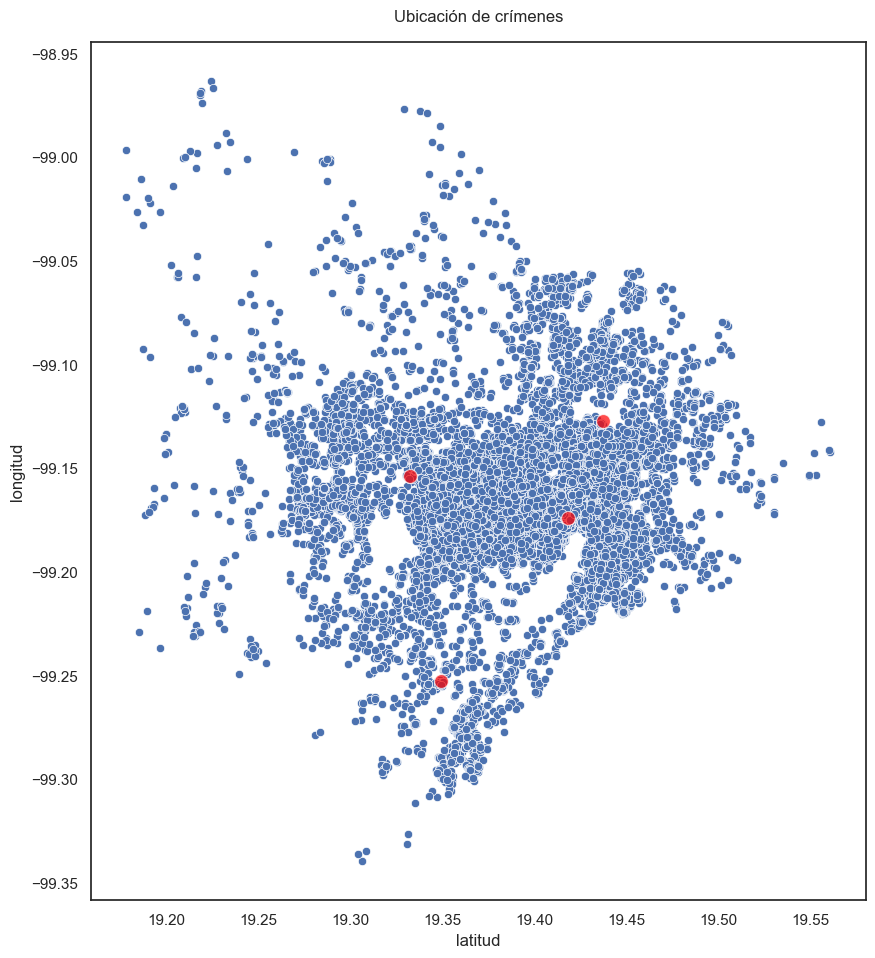

In [313]:
# Ubicaremos nuestros puntos de los clusters junto conlos de los hosters
fig = plt.figure(figsize=(10, 11.14286))
ax = fig.add_subplot()

ax.set_title('Ubicación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(x=df_airbnb_cdmx['latitude'], y=df_airbnb_cdmx['longitude'], ax=ax);
sns.scatterplot(x=centers['latitude'] , y = centers['longitude'], ax=ax, s=100, color='red', alpha = 0.7);

In [314]:
# Clasificaremos los datos para darles color y tener una mejor visualziacion de las zonas
clasificaciones = k_means.predict(df_airbnb_cdmx[['latitude', 'longitude']])
df_airbnb_cdmx_cc = df_airbnb_cdmx
df_airbnb_cdmx_cc['clasificaciones'] = clasificaciones

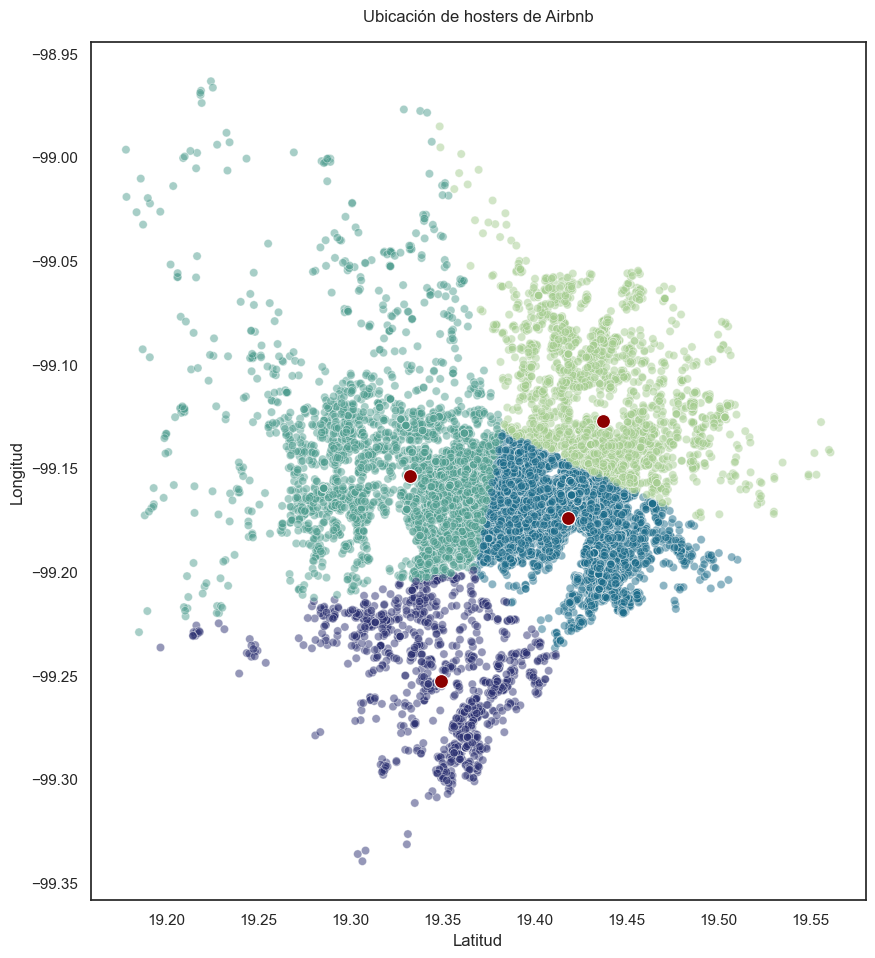

In [315]:
# Graficamos las zonas
fig = plt.figure(figsize=(10, 11.14286))
ax = fig.add_subplot()

ax.set_title('Ubicación de hosters de Airbnb', pad=15)
ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')

sns.scatterplot(x=df_airbnb_cdmx_cc['latitude'], y=df_airbnb_cdmx_cc['longitude'], ax=ax, hue=clasificaciones, palette='crest', alpha = 0.5);
sns.scatterplot(x=centers['latitude'] , y = centers['longitude'], ax=ax, s=100, color='darkred');

ax.get_legend().remove()


In [322]:
# para esas 4 zonas tendremos 10 ejecutivos de atención al cliente para df_airbnb_cdmx_cc
k_means_10 = KMeans(n_clusters=10, max_iter=10000, n_init = 'auto')

# Creamos la ubicación de esos 10 ejecutivos
k_means_10.fit(df_airbnb_cdmx_cc[['latitude', 'longitude']])
centers_10 = k_means_10.cluster_centers_
clasificaciones_10 = k_means_10.predict(df_airbnb_cdmx_cc[['latitude', 'longitude']])

centers = k_means_10.cluster_centers_
centers = pd.DataFrame(centers, columns=['latitude', 'longitude'])
centers

latitude  longitude
0  19.405865 -99.171498
1  19.286703 -99.152079
2  19.428272 -99.157138
3  19.362669 -99.268020
4  19.360170 -99.157287
5  19.305193 -99.048655
6  19.470856 -99.139018
7  19.336580 -99.203788
8  19.422724 -99.089269
9  19.439241 -99.195590

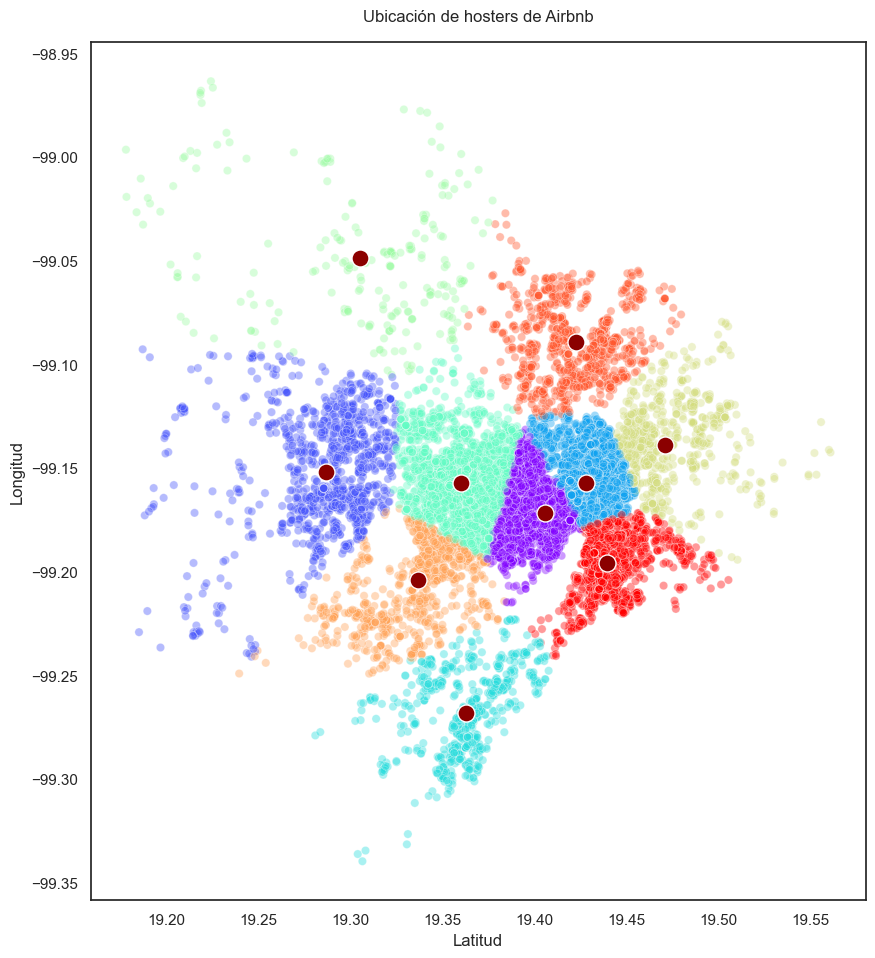

In [324]:
fig = plt.figure(figsize=(10, 11.14286))
ax = fig.add_subplot()

ax.set_title('Ubicación de hosters de Airbnb', pad=15)
ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')

sns.scatterplot(x=df_airbnb_cdmx_cc['latitude'], y=df_airbnb_cdmx_cc['longitude'], ax=ax, hue=clasificaciones_10, palette='rainbow', alpha = 0.4);
sns.scatterplot(x=centers['latitude'] , y = centers['longitude'], ax=ax, s=150, color='darkred');

ax.get_legend().remove()


In [328]:
# Regresión logística
# ---------------------------------------------------
# Al tener en Cuauhtémoc en neighbourhood casi 12 mil de 26 mil registros, se tomará este como un valor de tipo categórico
# Y el resto de las alcaldías como otro valor.

# Depuraremos nuestra tabla airbnb_cdmx_cc
# df_airbnb_cdmx_cc = df_airbnb_cdmx_cc.drop(columns=['neighbourhood_group', 'license'])

# Vemos los valores unicos de la columna neighbourhood
df_airbnb_cdmx_cc['neighbourhood'].unique()

array(['Cuajimalpa de Morelos', 'Cuauhtémoc', 'Coyoacán',
       'Miguel Hidalgo', 'Benito Juárez', 'Iztacalco', 'Tlalpan',
       'La Magdalena Contreras', 'Gustavo A. Madero', 'Xochimilco',
       'Álvaro Obregón', 'Venustiano Carranza', 'Iztapalapa',
       'Azcapotzalco', 'Tláhuac', 'Milpa Alta'], dtype=object)

In [330]:
# Empezamos a entrenar al modelo
df_airbnb_cdmx_cc_rl = df_airbnb_cdmx_cc
df_airbnb_cdmx_cc_rl['neighbourhood'] = df_airbnb_cdmx_cc_rl['neighbourhood'].apply(lambda x: 1 if x == 'Cuauhtémoc' else 0)

In [350]:
# Continuamos con la depuración de nuestra tabla airbnb_cdmx_cc y creamos una nueva
# df_airbnb_cdmx_cc_rl = df_airbnb_cdmx_cc_rl.drop(columns=['name', 'host_id', 'room_type', 'minimum_nights', 'last_review', 'reviews_per_month'])
df_airbnb_cdmx_cc_rl = df_airbnb_cdmx_cc_rl.drop(columns=['host_name'])


In [351]:
df_airbnb_cdmx_cc_rl.describe()

neighbourhood      latitude     longitude         price  \
count   26318.000000  26318.000000  26318.000000  2.631800e+04   
mean        0.447792     19.403772    -99.167410  1.637102e+03   
std         0.497276      0.042912      0.033604  1.502343e+04   
min         0.000000     19.177848    -99.339630  7.500000e+01   
25%         0.000000     19.387953    -99.179440  5.600000e+02   
50%         0.000000     19.414643    -99.167980  9.120000e+02   
75%         1.000000     19.431310    -99.154980  1.454000e+03   
max         1.000000     19.561010    -98.963360  1.838000e+06   

       number_of_reviews  calculated_host_listings_count  availability_365  \
count       26318.000000                    26318.000000      26318.000000   
mean           37.271411                       14.009651        227.522000   
std            65.389007                       34.478256        129.250883   
min             0.000000                        1.000000          0.000000   
25%             2.000000                        1.000000        106.000000   
50%            12.000000                        3.000000        268.000000   
75%            44.000000                       10.000000        347.000000   
max          1222.000000                      280.000000        365.000000   

       number_of_reviews_ltm  clasificaciones  
count           26318.000000     26318.000000  
mean               12.918763         1.579983  
std                19.318991         0.805686  
min                 0.000000         0.000000  
25%                 0.000000         1.000000  
50%                 5.000000         2.000000  
75%                18.000000         2.000000  
max               416.000000         3.000000

In [352]:
# Vamos a intentar entrenar un modelo de Regresión Logística para clasificar Cuauhtemoc u otras Alcaldías
X = df_airbnb_cdmx_cc_rl.drop(columns=['neighbourhood'])
y = df_airbnb_cdmx_cc_rl['neighbourhood']

In [353]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [354]:
# Establecemos los parametros por default del modelo
logreg = LogisticRegression(max_iter = 10000, random_state=40)

In [355]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=40)

In [356]:
# Predecimos
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [363]:
# Score del modelo
score_modelo = (logreg.score(X_test, y_test)) * 100
print(f'La exactitud de nuestro modelo para pronosticar Cuauhtémoc o no será del {score_modelo:.2f}%.')


La exactitud de nuestro modelo para pronosticar Cuauhtémoc o no será del 58.93%.


In [369]:
# Matriz de confusión

# Utilizaremos nuestro dataframe df_airbnb_cdmx_cc_rl ya con neighbourhood con valores 0 y 1
df_airbnb_cdmx_cc_rl

neighbourhood   latitude  longitude  price  \
id                                                               
35797                           0  19.382830 -99.271780   3437   
44616                           1  19.411620 -99.177940  18000   
61792                           1  19.410830 -99.180570   1031   
67703                           1  19.411520 -99.168570   1890   
70644                           0  19.354480 -99.162170    737   
...                           ...        ...        ...    ...   
985673895001471605              1  19.409586 -99.166383   1525   
985676768542852342              1  19.409086 -99.170103   1360   
985758830966947800              1  19.424403 -99.162281   2400   
985775761856052521              0  19.439136 -99.201918   3401   
985780693129316227              1  19.426129 -99.155407   1183   

                    number_of_reviews  calculated_host_listings_count  \
id                                                                      
35797                               0                               1   
44616                              64                              13   
61792                              63                               2   
67703                              47                               2   
70644                             120                               3   
...                               ...                             ...   
985673895001471605                  0                               5   
985676768542852342                  0                               1   
985758830966947800                  0                              62   
985775761856052521                  0                              62   
985780693129316227                  0                              62   

                    availability_365  number_of_reviews_ltm  clasificaciones  
id                                                                            
35797                            363                      0                3  
44616                            358                      5                2  
61792                            180                      5                2  
67703                            307                      4                2  
70644                            158                      8                1  
...                              ...                    ...              ...  
985673895001471605               269                      0                2  
985676768542852342               356                      0                2  
985758830966947800               352                      0                2  
985775761856052521               355                      0                2  
985780693129316227               287                      0                2  

[26318 rows x 9 columns]

In [370]:
# Empezamos a desarrollar nuestro modelo
X = df_airbnb_cdmx_cc_rl.drop(columns=['neighbourhood'])
y = df_airbnb_cdmx_cc_rl['neighbourhood']

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [372]:
y_pred = logreg.predict(X_test)

In [373]:
# Obtenemos nuestra matriz de confusión
from sklearn import metrics

In [374]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[3827,  581],
       [2543,  945]], dtype=int64)

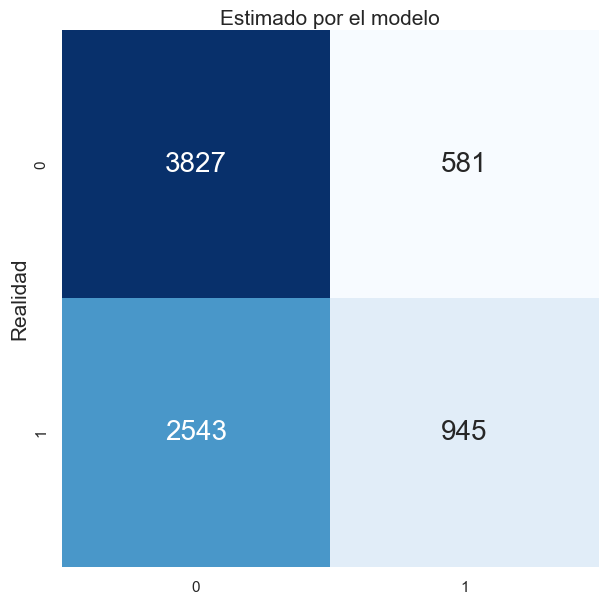

In [375]:
# Definimos el gráfico

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
    
    # Creamos el heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [378]:
# Las metricas de nuestro modelo
tn, fp, fn, tp = cnf_matrix.ravel()

precision = metrics.precision_score(y_test, y_pred)
exactitud = metrics.accuracy_score(y_test, y_pred)
sensibilidad = metrics.recall_score(y_test, y_pred)
especificidad = tn / (tn + fp)

print("Precision:", precision)
print("Exactitud:", exactitud)
print("Sensibilidad:", sensibilidad)
print("Especificidad:", especificidad)

Precision: 0.6192660550458715
Exactitud: 0.6043566362715299
Sensibilidad: 0.2709288990825688
Especificidad: 0.8681941923774955


In [381]:
# Curva ROC / AUC
# Utilizaremos nuestro dataframe df_airbnb_cdmx_cc_rl ya con neighbourhood con valores 0 y 1

# Volveremos a entrenar nuestro modelo para evaluarlo con una curva ROC / AUC:
X = df_airbnb_cdmx_cc_rl.drop(columns=['neighbourhood'])
y = df_airbnb_cdmx_cc_rl['neighbourhood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
logreg = LogisticRegression(max_iter=30000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=30000)

In [383]:
y_pred = logreg.predict(X_test)
y_pred

y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba[:10,:]

array([[0.60029404, 0.39970596],
       [0.59501719, 0.40498281],
       [0.53222188, 0.46777812],
       [0.36575774, 0.63424226],
       [0.62395032, 0.37604968],
       [0.48221892, 0.51778108],
       [0.62207372, 0.37792628],
       [0.53599779, 0.46400221],
       [0.5962076 , 0.4037924 ],
       [0.45673441, 0.54326559]])

In [384]:
# Realizamos una importación
from sklearn.metrics import roc_curve, auc

In [385]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

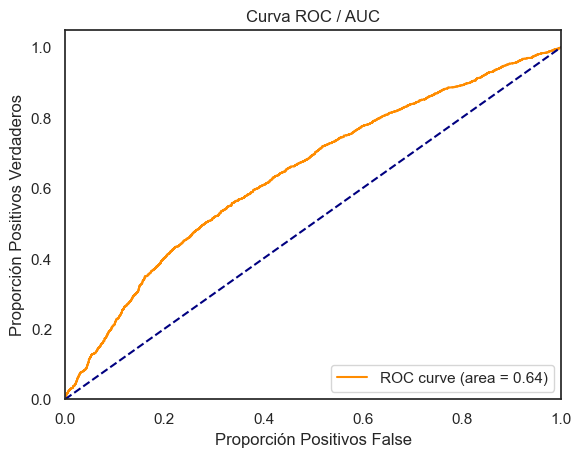

In [386]:
# Graficamos nuestra curva
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df_airbnb_cdmx

In [ ]:
df_airbnb_cdmx_cc_rl.head()

In [ ]:
df_airbnb_cdmx_95.head()